In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from google.colab import drive
from google.colab import files

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datathon/df_models.csv')
df.head(10)

id comercio   monto  \
0  91477f382c3cf63ab5cd9263b502109243741158   AMAZON    5.99   
1  91477f382c3cf63ab5cd9263b502109243741158    RAPPI   13.01   
2  91477f382c3cf63ab5cd9263b502109243741158    RAPPI   15.84   
3  91477f382c3cf63ab5cd9263b502109243741158   AMAZON    8.17   
4  91477f382c3cf63ab5cd9263b502109243741158   AMAZON    2.54   
5  91477f382c3cf63ab5cd9263b502109243741158   AMAZON    5.20   
6  91477f382c3cf63ab5cd9263b502109243741158   AMAZON   16.33   
7  91477f382c3cf63ab5cd9263b502109243741158      CFE  185.78   
8  91477f382c3cf63ab5cd9263b502109243741158   AMAZON   13.91   
9  91477f382c3cf63ab5cd9263b502109243741158   AMAZON   19.66   

   tipo_Venta_binaria     comercio_a_macro  mes  id_municipio  genero  edad  \
0                   1  Servicios Digitales    1     6519019.0       1  37.0   
1                   1  Servicios Digitales    1     6519019.0       1  37.0   
2                   1  Servicios Digitales    1     6519019.0       1  37.0   
3                   1  Servicios Digitales    1     6519019.0       1  37.0   
4                   1  Servicios Digitales    1     6519019.0       1  37.0   
5                   1  Servicios Digitales    1     6519019.0       1  37.0   
6                   1  Servicios Digitales    1     6519019.0       1  37.0   
7                   1   Servicios Públicos    1     6519019.0       1  37.0   
8                   1  Servicios Digitales    1     6519019.0       1  37.0   
9                   1  Servicios Digitales    1     6519019.0       1  37.0   

   tipo_de_persona_binario  dia_mes  
0                      1.0        2  
1                      1.0        5  
2                      1.0        5  
3                      1.0        5  
4                      1.0        5  
5                      1.0        6  
6                      1.0        7  
7                      1.0       11  
8                      1.0       13  
9                      1.0       14

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343979 entries, 0 to 343978
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       343979 non-null  object 
 1   comercio                 343979 non-null  object 
 2   monto                    343979 non-null  float64
 3   tipo_Venta_binaria       343979 non-null  int64  
 4   comercio_a_macro         343979 non-null  object 
 5   mes                      343979 non-null  int64  
 6   id_municipio             343979 non-null  float64
 7   genero                   343979 non-null  int64  
 8   edad                     343979 non-null  float64
 9   tipo_de_persona_binario  343979 non-null  float64
 10  dia_mes                  343979 non-null  int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 28.9+ MB


In [ ]:
df.isna().sum()

id                         0
comercio                   0
monto                      0
tipo_Venta_binaria         0
comercio_a_macro           0
mes                        0
id_municipio               0
genero                     0
edad                       0
tipo_de_persona_binario    0
dia_mes                    0
dtype: int64

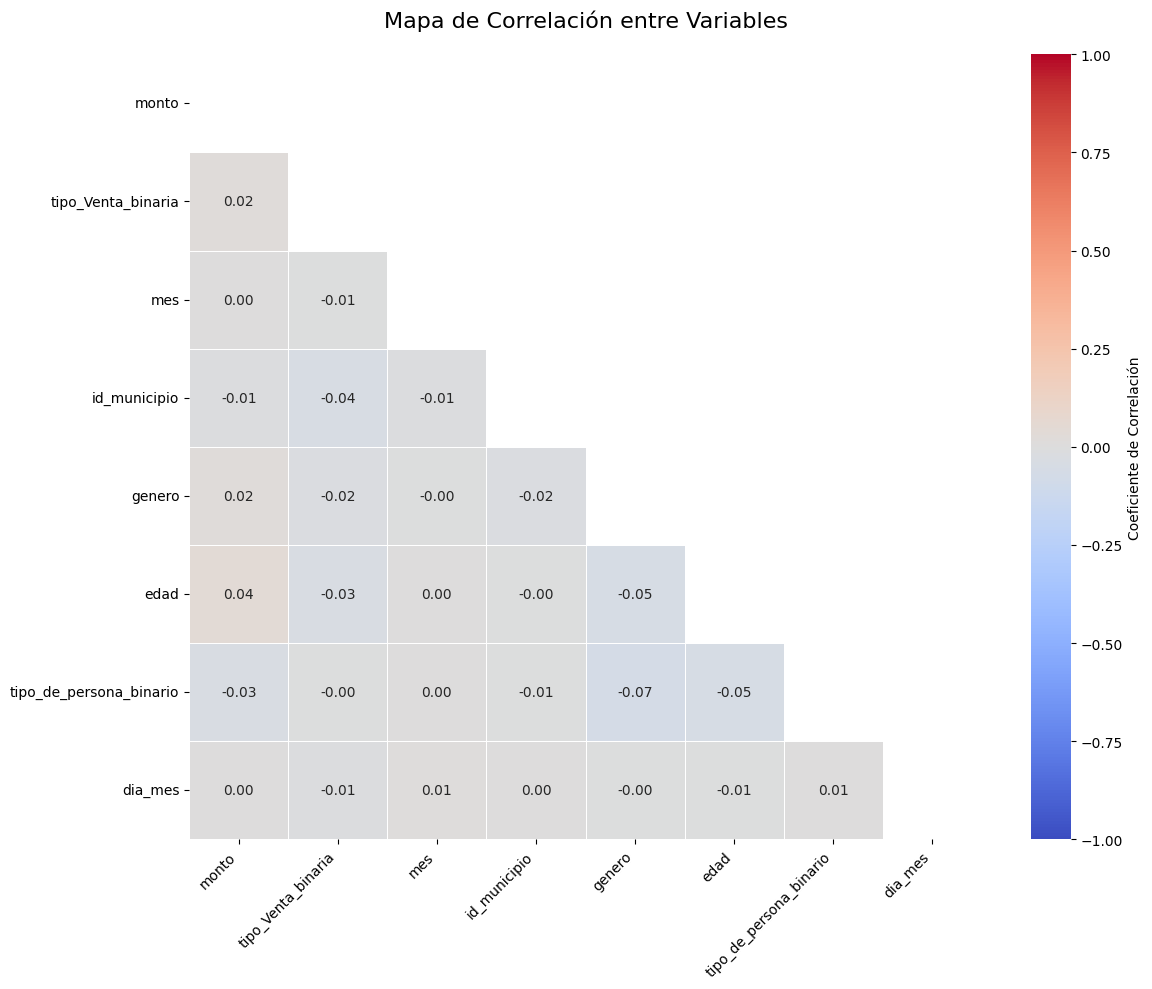


Las 5 correlaciones más fuertes:
edad - monto: 0.039
id_municipio - tipo_Venta_binaria: -0.042
edad - genero: -0.050
tipo_de_persona_binario - edad: -0.052
tipo_de_persona_binario - genero: -0.070


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar solo variables numéricas (las variables object no pueden incluirse en correlación)
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = numeric_df.corr()

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 10))

# Crear máscara para el triángulo superior (opcional)
mask = np.triu(correlation_matrix)

# Crear un mapa de calor (heatmap) con seaborn
sns.heatmap(correlation_matrix,
            annot=True,           # Mostrar valores
            fmt='.2f',            # Formato de valores (2 decimales)
            cmap='coolwarm',      # Esquema de colores
            mask=mask,            # Aplicar máscara para mostrar solo triángulo inferior
            linewidths=0.5,       # Anchura de líneas entre celdas
            vmin=-1,              # Valor mínimo para la escala de colores
            vmax=1,               # Valor máximo para la escala de colores
            cbar_kws={'label': 'Coeficiente de Correlación'})

# Añadir título y ajustar etiquetas
plt.title('Mapa de Correlación entre Variables', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Identificar las correlaciones más fuertes (absolutas)
# Obtener el triángulo inferior de la matriz de correlación
tril_matrix = np.tril(correlation_matrix.values, k=-1)
# Obtener los índices de las correlaciones ordenadas por valor absoluto
indices = np.dstack(np.unravel_index(np.argsort(np.abs(tril_matrix), axis=None), tril_matrix.shape))[0]
# Mostrar las 5 correlaciones más fuertes
print("\nLas 5 correlaciones más fuertes:")
for idx in indices[-5:]:
    i, j = idx
    var1 = correlation_matrix.index[i]
    var2 = correlation_matrix.columns[j]
    corr = correlation_matrix.iloc[i, j]
    print(f"{var1} - {var2}: {corr:.3f}")

=== TOP 10 COMERCIOS MÁS FRECUENTADOS ===
comercio
UBER                     40174
AMAZON                   38394
OXXO                     29377
UBER EATS                15156
MERCADO PAGO             14423
RAPPI                    12011
DIDI RIDES               11193
7 ELEVEN                 10317
TELCEL                    9968
FARMACIAS GUADALAJARA     6954
Name: count, dtype: int64

=== TOP 10 CATEGORÍAS DE COMERCIO MÁS FRECUENTES ===
comercio_a_macro
Servicios Digitales    90069
Transporte             65640
Supermercado           58999
Streaming              24974
Telecomunicaciones     20624
Retail                 16731
Finanzas               15273
Otros                  15175
Salud                  11105
Tecnología              9558
Name: count, dtype: int64


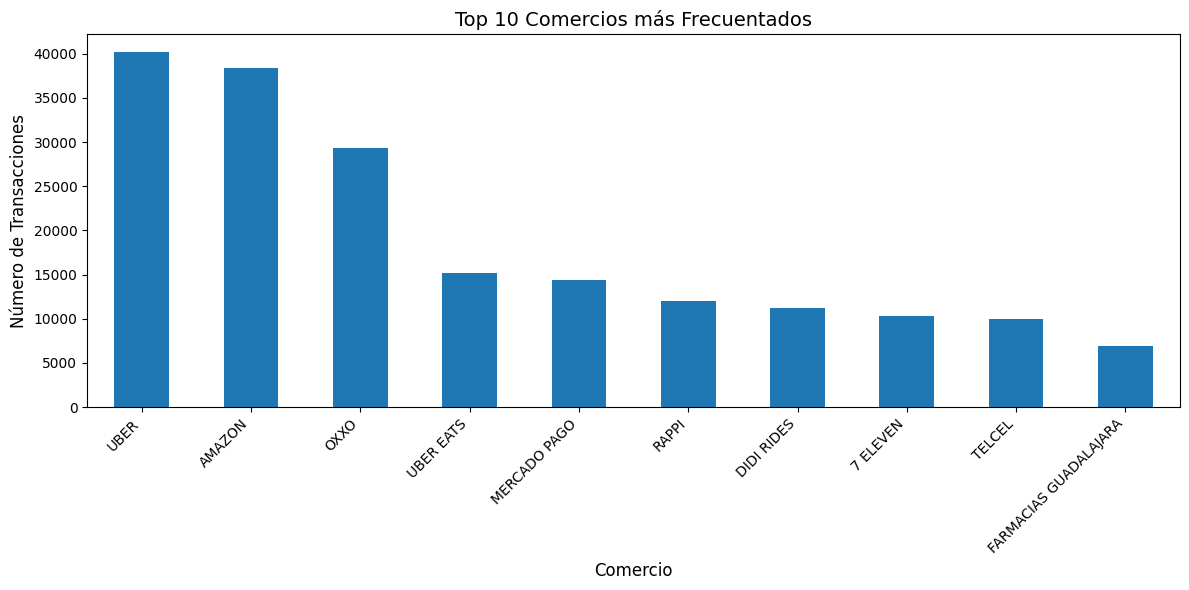

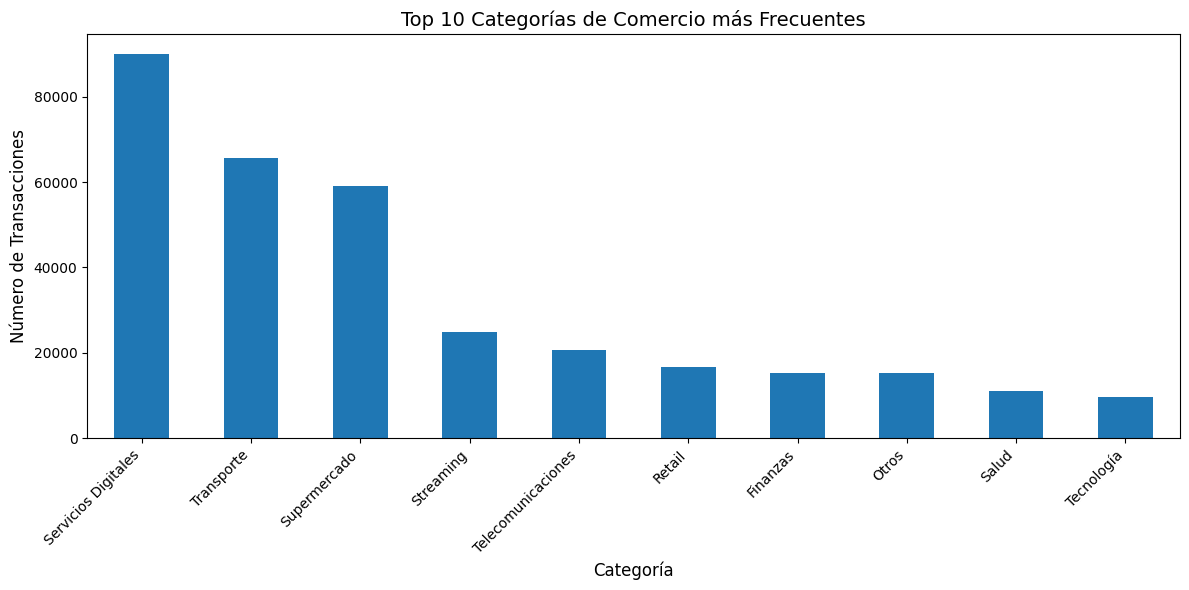


=== DISTRIBUCIÓN DE TRANSACCIONES POR RANGO DE MONTO ===
monto_rango
0-100         314211
101-500        27588
501-1000        1579
1001-5000        601
5001-10000         0
10000+             0
Name: count, dtype: int64


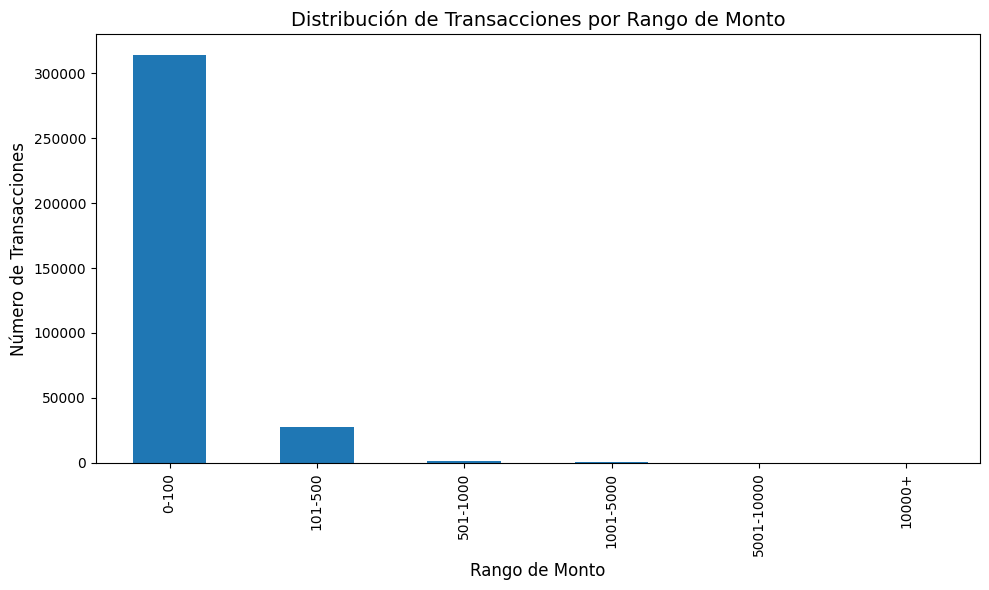


=== ANÁLISIS DE GASTOS RECURRENTES POR USUARIO ===
Número de usuarios con gastos recurrentes (3+ compras en mismo comercio): 995
Porcentaje de usuarios con gastos recurrentes: 100.00%

=== TOP 15 COMBINACIONES USUARIO-COMERCIO MÁS FRECUENTES ===
                                             id    comercio  frecuencia
1574   155a6724b044c00b762c334737124fe4602cf0eb    CALIENTE        2041
18564  d6ac3fa6bf4c71c236c0ec3b9aba16f9761b23ef    TULOTERO        1306
8630   62963834e157b2e52e0db4f39171a160ab243f30      AMAZON        1288
2209   1c0a4cc1a30a8fc039ba60edc6daebaf680c1c6d      BET365         962
3950   32287a982f01844ceed614cdcbd5595c839c0faf      AMAZON         823
3979   32bb37811d4549c0511c5a889b661574bf1488c0      BET365         730
1745   17553057673459a94adebd6b19bce398c1dd2e03        UBER         625
5502   40d7fb86daa5fefd3993e7146dc9cd6c4d2ba01d  DIDI RIDES         571
12564  90714f3b4cf4653254a264ef375d68885be49282        UBER         544
8758   644882538aa1b17b4efe866984

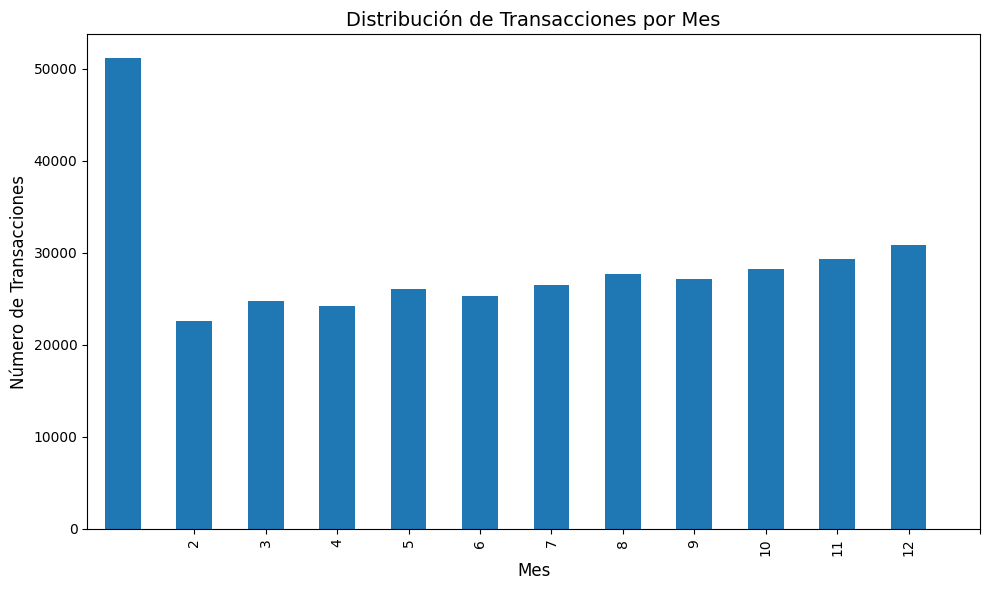


=== DISTRIBUCIÓN DE TRANSACCIONES POR DÍA DEL MES ===
dia_mes
1     11640
2     11471
3     11052
4     10921
5     10889
6     11173
7     10414
8     10931
9     11160
10    10596
Name: count, dtype: int64

=== COMBINACIONES COMERCIO-RANGO DE MONTO MÁS FRECUENTES ===
                  comercio monto_rango  frecuencia
534                   UBER       0-100       40084
36                  AMAZON       0-100       33356
354                   OXXO       0-100       29265
540              UBER EATS       0-100       14586
378                  RAPPI       0-100       11622
186             DIDI RIDES       0-100       11193
306           MERCADO PAGO       0-100       10558
0                 7 ELEVEN       0-100       10278
486                 TELCEL       0-100        9048
216  FARMACIAS GUADALAJARA       0-100        6655
174                   DIDI       0-100        6329
342                NETFLIX       0-100        6260
462                SPOTIFY       0-100        6146
42            A

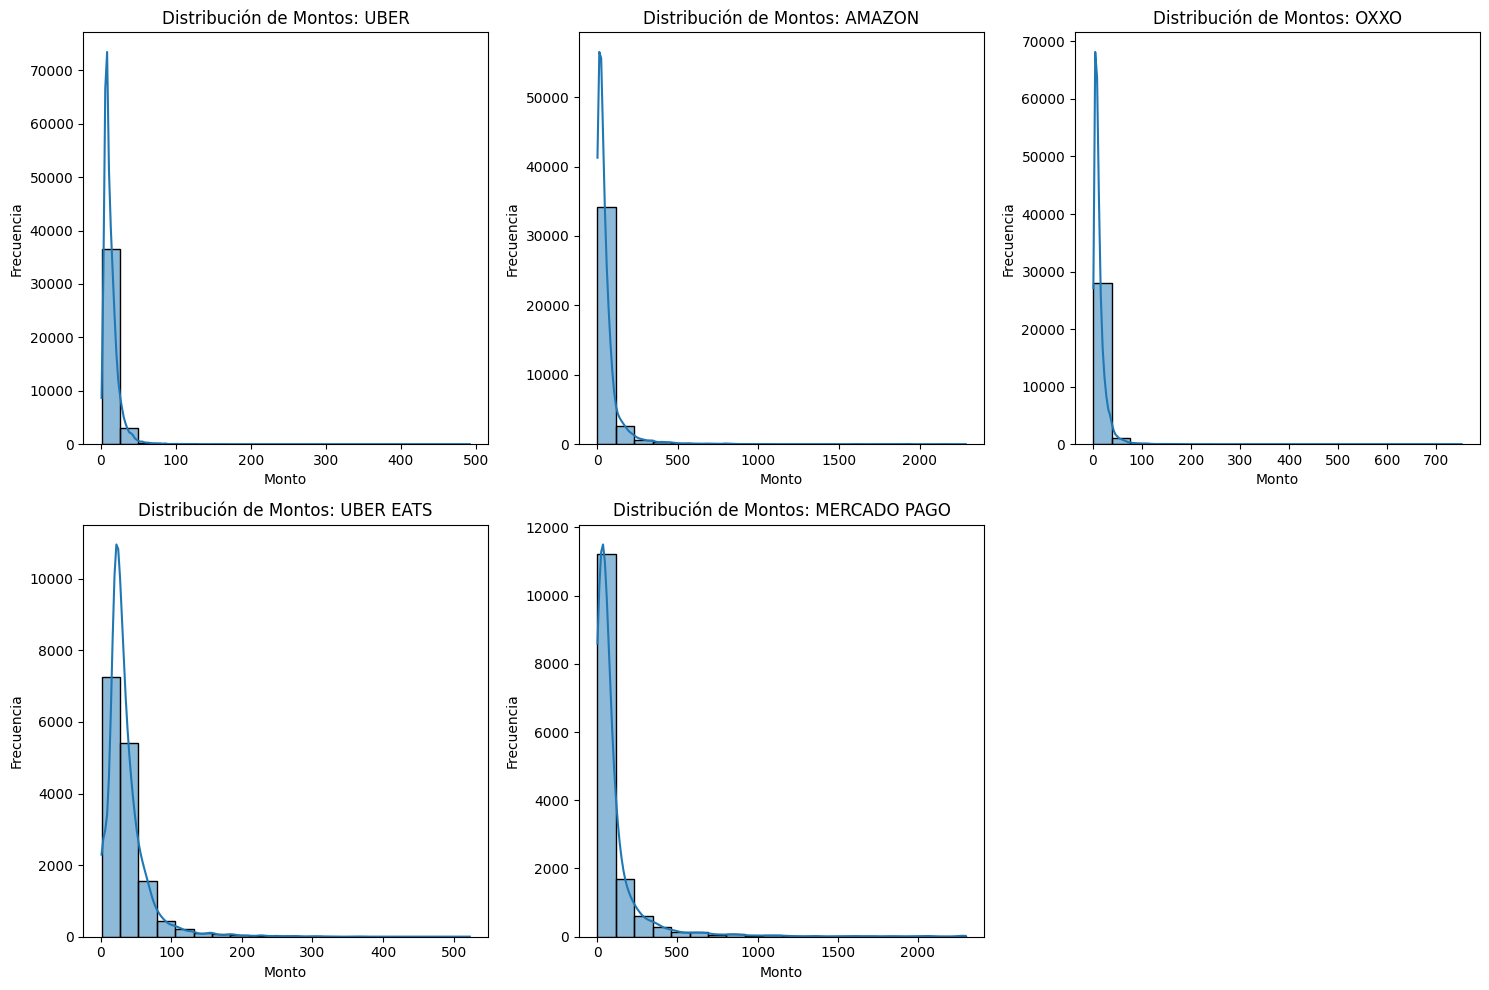

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# 1. Comercios más frecuentados
print("=== TOP 10 COMERCIOS MÁS FRECUENTADOS ===")
comercio_counts = df['comercio'].value_counts().head(10)
print(comercio_counts)

# 2. Categorías de comercio más frecuentes
print("\n=== TOP 10 CATEGORÍAS DE COMERCIO MÁS FRECUENTES ===")
categoria_counts = df['comercio_a_macro'].value_counts().head(10)
print(categoria_counts)

# 3. Visualización de comercios frecuentes
plt.figure(figsize=(12, 6))
comercio_counts.plot(kind='bar')
plt.title('Top 10 Comercios más Frecuentados', fontsize=14)
plt.xlabel('Comercio', fontsize=12)
plt.ylabel('Número de Transacciones', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 4. Visualización de categorías frecuentes
plt.figure(figsize=(12, 6))
categoria_counts.plot(kind='bar')
plt.title('Top 10 Categorías de Comercio más Frecuentes', fontsize=14)
plt.xlabel('Categoría', fontsize=12)
plt.ylabel('Número de Transacciones', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 5. Análisis de rangos de monto más comunes
# Crear rangos de montos para mejor análisis
df['monto_rango'] = pd.cut(df['monto'],
                          bins=[0, 100, 500, 1000, 5000, 10000, float('inf')],
                          labels=['0-100', '101-500', '501-1000', '1001-5000', '5001-10000', '10000+'])

print("\n=== DISTRIBUCIÓN DE TRANSACCIONES POR RANGO DE MONTO ===")
monto_counts = df['monto_rango'].value_counts().sort_index()
print(monto_counts)

plt.figure(figsize=(10, 6))
monto_counts.plot(kind='bar')
plt.title('Distribución de Transacciones por Rango de Monto', fontsize=14)
plt.xlabel('Rango de Monto', fontsize=12)
plt.ylabel('Número de Transacciones', fontsize=12)
plt.tight_layout()
plt.show()

# 6. Gastos recurrentes por usuario
# Identificar patrones de compra recurrentes por usuario
print("\n=== ANÁLISIS DE GASTOS RECURRENTES POR USUARIO ===")

# Contar frecuencia de combinación (usuario, comercio)
user_store_freq = df.groupby(['id', 'comercio']).size().reset_index(name='frecuencia')

# Filtrar sólo combinaciones con al menos 3 transacciones (indicativo de recurrencia)
recurring_expenses = user_store_freq[user_store_freq['frecuencia'] >= 3]

print(f"Número de usuarios con gastos recurrentes (3+ compras en mismo comercio): {recurring_expenses['id'].nunique()}")
print(f"Porcentaje de usuarios con gastos recurrentes: {recurring_expenses['id'].nunique() / df['id'].nunique() * 100:.2f}%")

# Top combinaciones usuario-comercio más recurrentes
print("\n=== TOP 15 COMBINACIONES USUARIO-COMERCIO MÁS FRECUENTES ===")
print(recurring_expenses.sort_values('frecuencia', ascending=False).head(15))

# 7. Análisis de patrones temporales
print("\n=== DISTRIBUCIÓN DE TRANSACCIONES POR MES ===")
print(df['mes'].value_counts().sort_index())

plt.figure(figsize=(10, 6))
df['mes'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribución de Transacciones por Mes', fontsize=14)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Número de Transacciones', fontsize=12)
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()

print("\n=== DISTRIBUCIÓN DE TRANSACCIONES POR DÍA DEL MES ===")
print(df['dia_mes'].value_counts().sort_index().head(10))

# 8. Combinaciones comercio-monto más frecuentes
print("\n=== COMBINACIONES COMERCIO-RANGO DE MONTO MÁS FRECUENTES ===")
comercio_monto = df.groupby(['comercio', 'monto_rango']).size().reset_index(name='frecuencia')
print(comercio_monto.sort_values('frecuencia', ascending=False).head(15))

# 9. Gastos recurrentes por categoría y frecuencia
print("\n=== PATRONES DE GASTO POR CATEGORÍA Y FRECUENCIA ===")
categoria_freq = df.groupby('id')['comercio_a_macro'].apply(list)

# Contar patrones más comunes de categorías
cat_patterns = []
for cats in categoria_freq.values:
    # Contar pares consecutivos de categorías
    for i in range(len(cats)-1):
        cat_patterns.append((cats[i], cats[i+1]))

print("Top 10 patrones de categorías consecutivas:")
print(Counter(cat_patterns).most_common(10))

# 10. Análisis de montos recurrentes por comercio
print("\n=== MONTOS RECURRENTES POR COMERCIO TOP ===")
# Obtener top 5 comercios
top5_comercios = comercio_counts.index[:5].tolist()

plt.figure(figsize=(15, 10))
for i, comercio in enumerate(top5_comercios):
    plt.subplot(2, 3, i+1)
    # Histograma de montos para este comercio
    sns.histplot(df[df['comercio'] == comercio]['monto'], bins=20, kde=True)
    plt.title(f'Distribución de Montos: {comercio}')
    plt.xlabel('Monto')
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [ ]:
df['comercio_a_macro'].unique()

array(['Servicios Digitales', 'Servicios Públicos', 'Supermercado',
       'Salud', 'Retail', 'Otros', 'Transporte', 'Comida', 'Finanzas',
       'Telecomunicaciones', 'Streaming', 'Tecnología',
       'Servicios Profesionales'], dtype=object)

In [ ]:
!pip install tensorflow

Habilitado entrenamiento con precisión mixta
Cargando datos desde /content/drive/MyDrive/Datathon/df_models.csv...
Dataset cargado: 343979 filas, 11 columnas
                                         id comercio  monto  \
0  91477f382c3cf63ab5cd9263b502109243741158   AMAZON   5.99   
1  91477f382c3cf63ab5cd9263b502109243741158    RAPPI  13.01   
2  91477f382c3cf63ab5cd9263b502109243741158    RAPPI  15.84   
3  91477f382c3cf63ab5cd9263b502109243741158   AMAZON   8.17   
4  91477f382c3cf63ab5cd9263b502109243741158   AMAZON   2.54   

   tipo_Venta_binaria     comercio_a_macro  mes  id_municipio  genero  edad  \
0                   1  Servicios Digitales    1     6519019.0       1  37.0   
1                   1  Servicios Digitales    1     6519019.0       1  37.0   
2                   1  Servicios Digitales    1     6519019.0       1  37.0   
3                   1  Servicios Digitales    1     6519019.0       1  37.0   
4                   1  Servicios Digitales    1     6519019.0       

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ sequence_input      │ (None, 5, 10)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ (None, 5, 128)    │     29,184 │ sequence_input[0… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_1     │ (None, 128)       │     74,496 │ bidirectional[0]… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 64)        │      8,256 │ bidirectional_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda (Lambda)     │ (None, 4)         │          0 │ sequence_input[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 64)        │        256 │ dense[0][0]       │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 32)        │        160 │ lambda[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 64)        │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dense_1[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 96)        │          0 │ dropout[0][0],    │
│ (Concatenate)       │                   │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 128)       │     12,416 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dense_2[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 128)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 32)        │      4,128 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 32)        │      4,128 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 32)        │      4,128 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ amount_output       │ (None, 1)         │         33 │ dense_3[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ day_output (Dense)  │ (None, 31)        │      1,023 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ category_output     │ (None, 13)        │        429 │ dense_5[0][0]     │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 139,277 (544.05 KB)

 Trainable params: 138,829 (542.30 KB)

 Non-trainable params: 448 (1.75 KB)

None
Epoch 1/15
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - amount_output_loss: 1.5310 - amount_output_mae: 0.6775 - category_output_accuracy: 0.1249 - category_output_loss: 2.6917 - day_output_accuracy: 0.0341 - day_output_loss: 3.6298 - loss: 16.8657
Epoch 1: val_loss improved from inf to 14.93249, saving model to best_transaction_model.h5


111/111 ━━━━━━━━━━━━━━━━━━━━ 25s 84ms/step - amount_output_loss: 1.5288 - amount_output_mae: 0.6767 - category_output_accuracy: 0.1253 - category_output_loss: 2.6898 - day_output_accuracy: 0.0341 - day_output_loss: 3.6291 - loss: 16.8563 - val_amount_output_loss: 0.9411 - val_amount_output_mae: 0.4731 - val_category_output_accuracy: 0.1816 - val_category_output_loss: 2.3514 - val_day_output_accuracy: 0.0299 - val_day_output_loss: 3.4686 - val_loss: 14.9325 - learning_rate: 0.0010
Epoch 2/15
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - amount_output_loss: 1.0136 - amount_output_mae: 0.4913 - category_output_accuracy: 0.2402 - category_output_loss: 2.2730 - day_output_accuracy: 0.0329 - day_output_loss: 3.4785 - loss: 14.7904
Epoch 2: val_loss did not improve from 14.93249
111/111 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - amount_output_loss: 1.0143 - amount_output_mae: 0.4913 - category_output_accuracy: 0.2402 - category_output_loss: 2.2729 - day_output_accuracy: 0.0329 - day_output_loss: 3.478

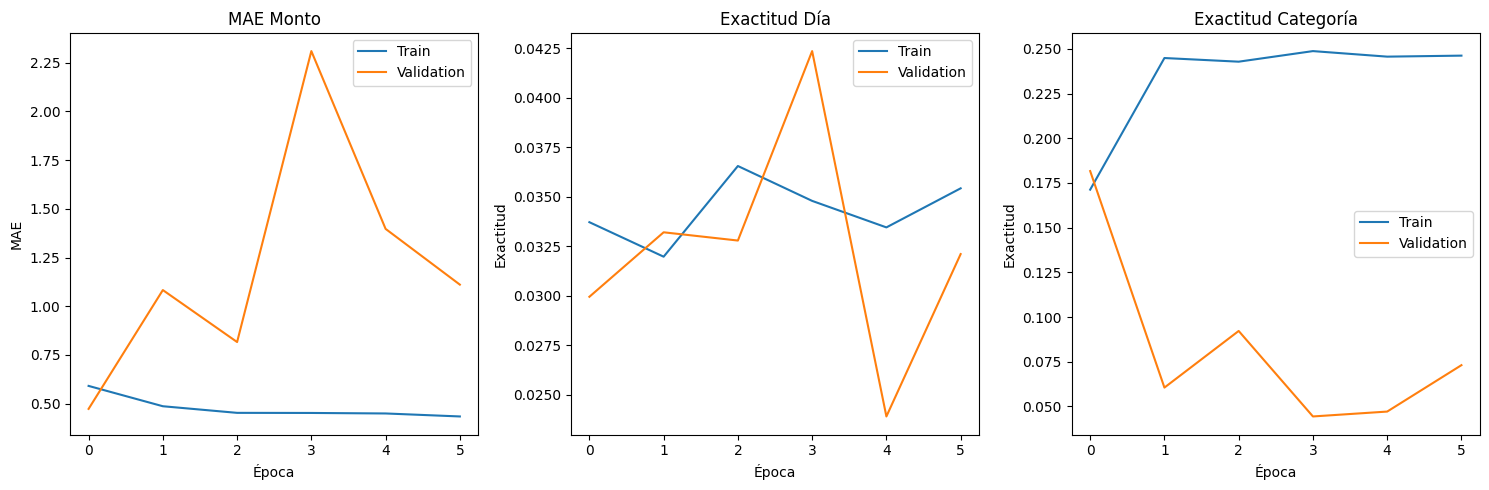


--- EVALUACIÓN DEL MODELO ---

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - amount_output_loss: 1.0213 - amount_output_mae: 0.4338 - category_output_accuracy: 0.1580 - category_output_loss: 2.3800 - day_output_accuracy: 0.0330 - day_output_loss: 3.4913 - loss: 15.1445
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step
MAE Monto: $46.71
Exactitud Día: 0.0322
Exactitud Día (±1 día): 0.0972
Exactitud Día (±3 días): 0.2296
Exactitud Categoría: 0.1651


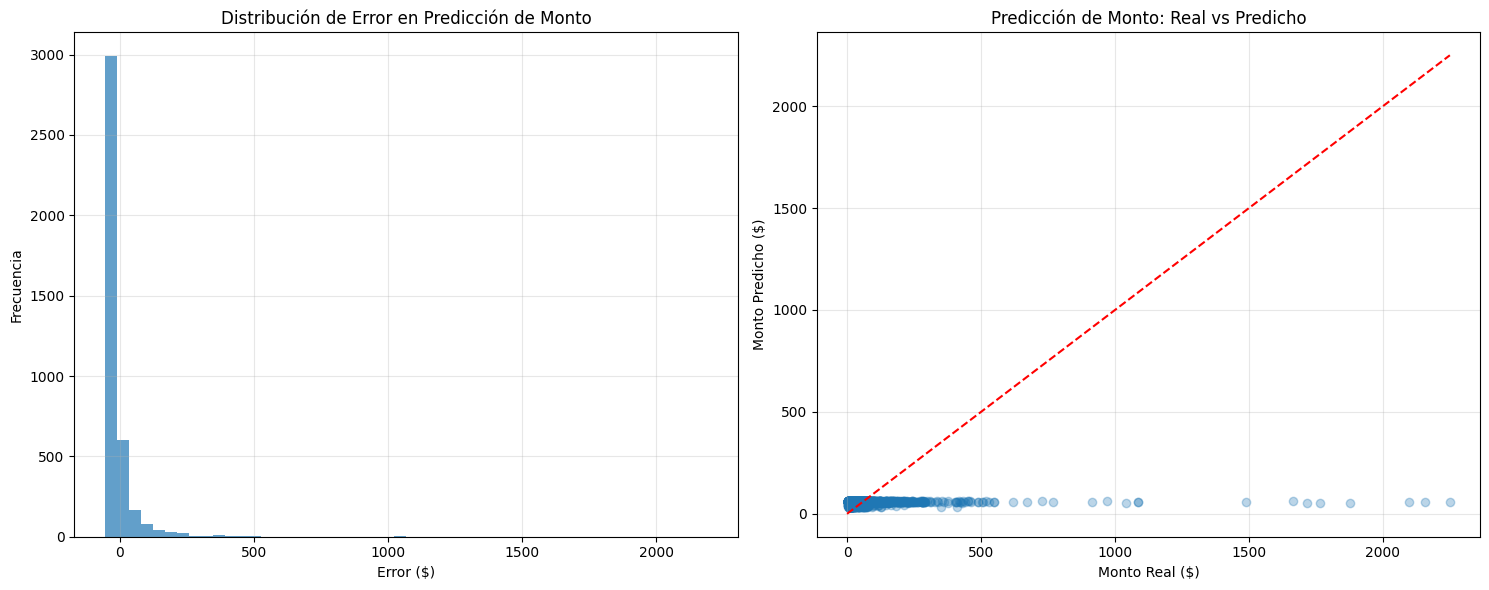

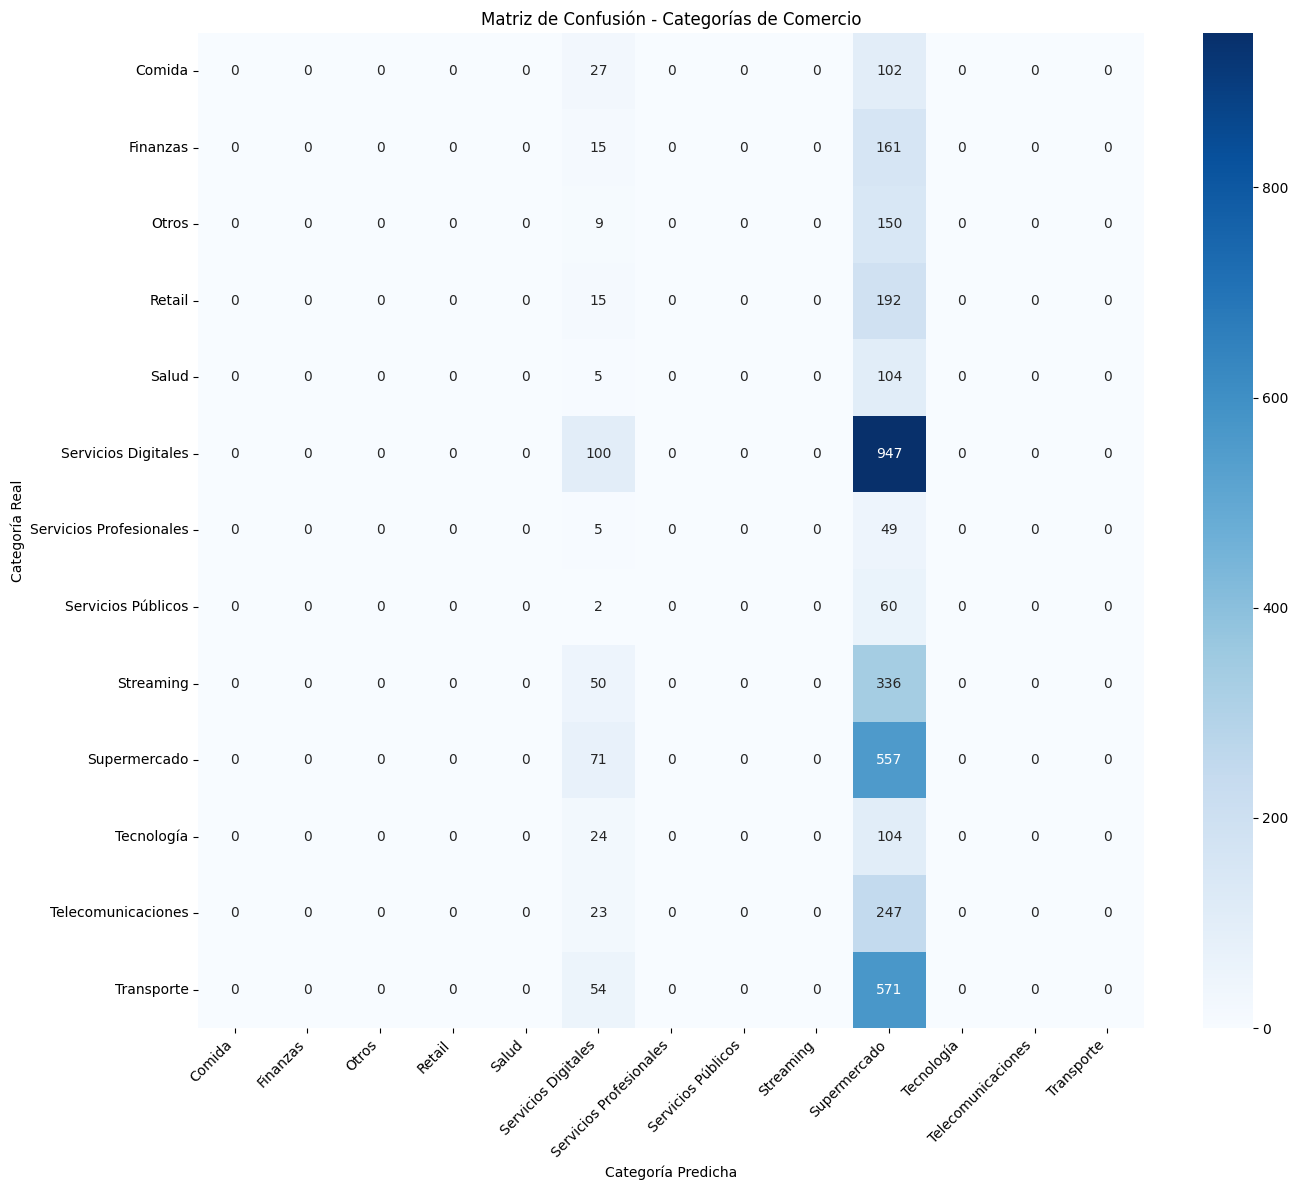

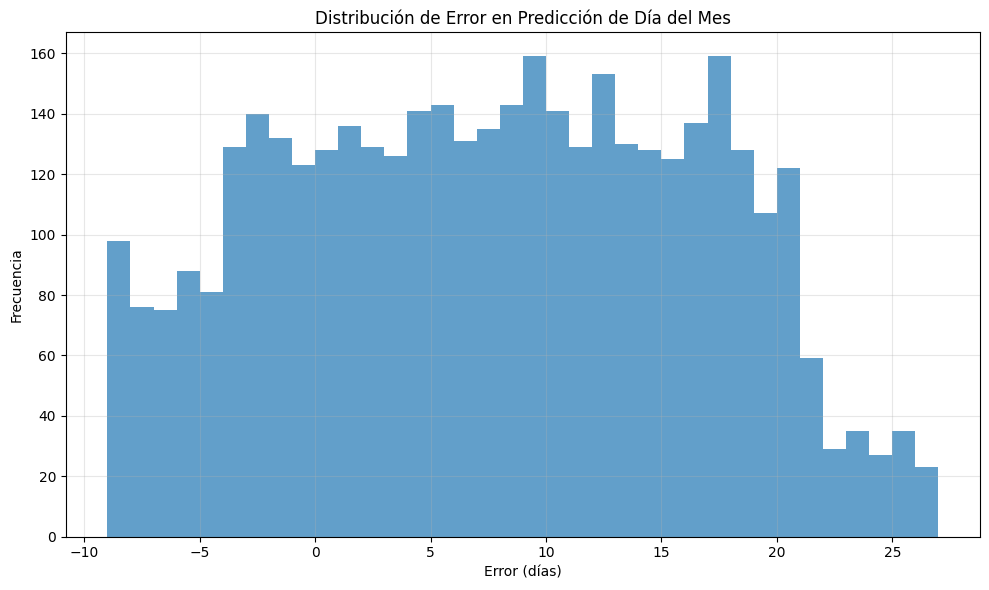


--- RESUMEN DE RENDIMIENTO ---

Error Absoluto Medio en Monto: $46.71
Exactitud en Día del Mes: 0.0322
Exactitud en Día del Mes (±3 días): 0.2296
Exactitud en Categoría de Comercio: 0.1651


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import gc
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, GRU, Dropout, Concatenate, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
# from tensorflow.keras.mixed_precision import experimental as mixed_precision # Eliminar esta importación antigua

# Activar mixed precision para ahorrar memoria GPU
try:
    # policy = mixed_precision.Policy('mixed_float16') # Usar el nuevo path
    policy = tf.keras.mixed_precision.Policy('mixed_float16')
    tf.keras.mixed_precision.set_global_policy(policy) # Usar el nuevo path
    print('Habilitado entrenamiento con precisión mixta')
except:
    print('Precisión mixta no soportada o error al configurar, usando float32') # Mensaje más genérico

# Liberar memoria al inicio
gc.collect()
tf.keras.backend.clear_session()

# Configurar TensorFlow para crecimiento de memoria gradual
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print(f"GPUs disponibles: {len(gpus)}")
    except RuntimeError as e:
        print(e)

def load_and_prepare_data(filepath, test_size=0.2):
    """Carga y prepara los datos del archivo CSV"""
    print(f"Cargando datos desde {filepath}...")
    df = pd.read_csv(filepath)

    # Mostrar información del dataset
    print(f"Dataset cargado: {df.shape[0]} filas, {df.shape[1]} columnas")
    print(df.head())

    # Asegurar que la fecha esté en formato datetime
    if 'fecha' not in df.columns:
        # Reconstruir fecha a partir de mes y dia_mes (año ficticio 2023)
        df['fecha'] = pd.to_datetime(
            '2023-' + df['mes'].astype(str).str.zfill(2) + '-' +
            df['dia_mes'].astype(str).str.zfill(2)
        )

    # Eliminar duplicados o filas con datos faltantes
    df = df.dropna()
    print(f"Dataset después de limpieza: {df.shape[0]} filas")

    # Dividir en entrenamiento y prueba por usuario para evitar data leakage
    usuarios = df['id'].unique()
    np.random.seed(42)
    train_users = np.random.choice(usuarios, size=int(len(usuarios)*(1-test_size)), replace=False)

    df_train = df[df['id'].isin(train_users)]
    df_test = df[~df['id'].isin(train_users)]

    print(f"Datos de entrenamiento: {df_train.shape[0]} filas ({len(train_users)} usuarios)")
    print(f"Datos de prueba: {df_test.shape[0]} filas ({len(usuarios)-len(train_users)} usuarios)")

    # Liberar memoria
    gc.collect()

    return df_train, df_test

def prepare_sequences(df, sequence_length=5, max_samples_per_user=50):
    """Prepara secuencias de transacciones limitando la cantidad por usuario para ahorrar memoria"""
    print("Preparando secuencias de transacciones...")

    # Ordenar por usuario y fecha
    df = df.sort_values(['id', 'fecha'])

    # Codificar variables categóricas
    le_comercio = LabelEncoder()
    le_macro = LabelEncoder()

    df['comercio_encoded'] = le_comercio.fit_transform(df['comercio'])
    df['comercio_macro_encoded'] = le_macro.fit_transform(df['comercio_a_macro'])

    # Crear datasets por usuario
    user_sequences = []
    user_targets = []

    # Contador para monitorear progreso
    total_users = len(df['id'].unique())
    processed = 0

    for user_id, user_data in df.groupby('id'):
        processed += 1
        if processed % 100 == 0:
            print(f"Procesando usuario {processed}/{total_users}")

        # Si el usuario tiene muy pocas transacciones, saltamos
        if len(user_data) <= sequence_length:
            continue

        # Convertir a numpy para manipulación más eficiente
        user_array = user_data[[
            'comercio_encoded', 'comercio_macro_encoded', 'monto',
            'tipo_Venta_binaria', 'mes', 'dia_mes',
            'edad', 'genero', 'tipo_de_persona_binario', 'id_municipio'
        ]].values

        # Crear secuencias limitadas por usuario
        sample_indices = list(range(len(user_array) - sequence_length))
        if len(sample_indices) > max_samples_per_user:
            sample_indices = np.random.choice(sample_indices, max_samples_per_user, replace=False)

        for i in sample_indices:
            # Secuencia de historial: últimas n transacciones
            history_seq = user_array[i:i+sequence_length]

            # Objetivo: siguiente transacción
            next_tx = user_array[i+sequence_length]

            user_sequences.append(history_seq)
            user_targets.append([
                next_tx[2],              # monto
                next_tx[5],              # dia_mes
                next_tx[1]               # comercio_macro_encoded
            ])

        # Limpiar para ahorrar memoria periódicamente
        if processed % 500 == 0:
            gc.collect()

    # Convertir a arrays numpy
    print("Convirtiendo secuencias a arrays numpy...")
    X = np.array(user_sequences, dtype=np.float32)  # Usar float32 en lugar de float64 para ahorrar memoria
    y_amount = np.array([t[0] for t in user_targets], dtype=np.float32)
    y_day = np.array([t[1] for t in user_targets], dtype=np.int32)
    y_category = np.array([t[2] for t in user_targets], dtype=np.int32)

    # Normalizar montos (muy sesgados)
    print("Normalizando datos...")
    amount_scaler = StandardScaler()
    y_amount = amount_scaler.fit_transform(y_amount.reshape(-1, 1)).flatten()

    # One-hot encoding para día del mes (1-31)
    y_day_onehot = tf.keras.utils.to_categorical(y_day - 1, num_classes=31)

    # One-hot encoding para categoría de comercio
    y_category_onehot = tf.keras.utils.to_categorical(y_category, num_classes=len(le_macro.classes_))

    print(f"Datos preparados: {len(X)} secuencias de entrada")

    # Liberar memoria
    del user_sequences, user_targets
    gc.collect()

    return X, y_amount, y_day_onehot, y_category_onehot, amount_scaler, le_macro

def build_optimized_model(sequence_length, n_features, n_categorias, n_dias=31, units=64):
    """Construye modelo optimizado para uso de memoria"""

    # Input para secuencias de transacciones
    sequence_input = Input(shape=(sequence_length, n_features), name='sequence_input')

    # Usar GRU en lugar de LSTM para ahorrar memoria
    gru_layer = tf.keras.layers.Bidirectional(GRU(units, return_sequences=True))(sequence_input)
    gru_layer = tf.keras.layers.Bidirectional(GRU(units))(gru_layer)

    # Capas densas para representación secuencial
    sequence_features = Dense(64, activation='relu')(gru_layer)
    sequence_features = BatchNormalization()(sequence_features)
    sequence_features = Dropout(0.3)(sequence_features)

    # Características demográficas del usuario (últimas de la secuencia)
    user_features = tf.keras.layers.Lambda(lambda x: x[:, -1, 6:])(sequence_input)
    user_dense = Dense(32, activation='relu')(user_features)
    user_dense = BatchNormalization()(user_dense)

    # Combinar características
    combined_features = Concatenate()([sequence_features, user_dense])
    combined_dense = Dense(128, activation='relu')(combined_features)
    combined_dense = BatchNormalization()(combined_dense)
    combined_dense = Dropout(0.3)(combined_dense)

    # Rama para predicción de MONTO (regresión)
    amount_dense = Dense(32, activation='relu')(combined_dense)  # Reducido de 64 a 32
    amount_output = Dense(1, name='amount_output')(amount_dense)

    # Rama para predicción de DÍA DEL MES (clasificación)
    day_dense = Dense(32, activation='relu')(combined_dense)  # Reducido de 64 a 32
    day_output = Dense(n_dias, activation='softmax', name='day_output')(day_dense)

    # Rama para predicción de CATEGORÍA (clasificación)
    category_dense = Dense(32, activation='relu')(combined_dense)  # Reducido de 64 a 32
    category_output = Dense(n_categorias, activation='softmax', name='category_output')(category_dense)

    # Crear modelo completo
    model = Model(
        inputs=sequence_input,
        outputs=[amount_output, day_output, category_output]
    )

    # Compilar modelo con pérdidas y métricas apropiadas
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss={
            'amount_output': 'mse',
            'day_output': 'categorical_crossentropy',
            'category_output': 'categorical_crossentropy'
        },
        metrics={
            'amount_output': ['mae'],
            'day_output': ['accuracy'],
            'category_output': ['accuracy']
        },
        loss_weights={
            'amount_output': 1.0,
            'day_output': 2.0,
            'category_output': 3.0
        }
    )

    return model

def train_with_generators(X_train, y_train_dict, X_val, y_val_dict, batch_size=128, epochs=15):
    """Entrena el modelo usando generadores para reducir uso de memoria"""

    # Crear generador personalizado para entregar datos por lotes
    def data_generator(X, y_dict, batch_size):
        n_samples = X.shape[0]
        while True:
            indices = np.random.permutation(n_samples)
            for i in range(0, n_samples, batch_size):
                batch_indices = indices[i:i+batch_size]
                yield X[batch_indices], {
                    'amount_output': y_dict['amount_output'][batch_indices],
                    'day_output': y_dict['day_output'][batch_indices],
                    'category_output': y_dict['category_output'][batch_indices]
                }

    # Parámetros del modelo
    sequence_length = X_train.shape[1]
    n_features = X_train.shape[2]
    n_categorias = y_train_dict['category_output'].shape[1]

    # Construir modelo
    model = build_optimized_model(
        sequence_length=sequence_length,
        n_features=n_features,
        n_categorias=n_categorias
    )

    print(model.summary())

    # Callbacks para monitorear y optimizar entrenamiento
    callbacks = [
        EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True,
            verbose=1
        ),
        ModelCheckpoint(
            'best_transaction_model.h5',
            monitor='val_loss',
            save_best_only=True,
            verbose=1
        ),
        ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=3,
            min_lr=0.0001,
            verbose=1
        )
    ]

    # Calculamos pasos por época e iteraciones de validación
    steps_per_epoch = X_train.shape[0] // batch_size
    validation_steps = X_val.shape[0] // batch_size

    # Entrenar con generadores
    history = model.fit(
        data_generator(X_train, y_train_dict, batch_size),
        steps_per_epoch=steps_per_epoch,
        validation_data=data_generator(X_val, y_val_dict, batch_size),
        validation_steps=validation_steps,
        epochs=epochs,
        callbacks=callbacks,
        verbose=1
    )

    return model, history

def evaluate_model(model, X_test, y_test_dict, amount_scaler, le_macro):
    """Evalúa el modelo en el conjunto de prueba y muestra métricas detalladas"""

    print("\n--- EVALUACIÓN DEL MODELO ---\n")

    # Evaluar en conjunto de prueba
    evaluation = model.evaluate(
        X_test,
        y_test_dict,
        batch_size=256,  # Batch grande para evaluación más rápida
        verbose=1
    )

    # Obtener predicciones
    amount_pred, day_pred, category_pred = model.predict(X_test, batch_size=256)

    # Métricas para monto
    y_amount_true = amount_scaler.inverse_transform(y_test_dict['amount_output'].reshape(-1, 1)).flatten()
    y_amount_pred = amount_scaler.inverse_transform(amount_pred).flatten()

    mae_amount = np.mean(np.abs(y_amount_true - y_amount_pred))
    print(f"MAE Monto: ${mae_amount:.2f}")

    # Métricas para día
    y_day_true = np.argmax(y_test_dict['day_output'], axis=1) + 1
    y_day_pred = np.argmax(day_pred, axis=1) + 1

    day_accuracy = np.mean(y_day_true == y_day_pred)
    day_accuracy_margin1 = np.mean(np.abs(y_day_true - y_day_pred) <= 1)
    day_accuracy_margin3 = np.mean(np.abs(y_day_true - y_day_pred) <= 3)

    print(f"Exactitud Día: {day_accuracy:.4f}")
    print(f"Exactitud Día (±1 día): {day_accuracy_margin1:.4f}")
    print(f"Exactitud Día (±3 días): {day_accuracy_margin3:.4f}")

    # Métricas para categoría
    y_category_true = np.argmax(y_test_dict['category_output'], axis=1)
    y_category_pred = np.argmax(category_pred, axis=1)

    category_accuracy = np.mean(y_category_true == y_category_pred)

    print(f"Exactitud Categoría: {category_accuracy:.4f}")

    # Matriz de confusión para categorías
    from sklearn.metrics import confusion_matrix, classification_report

    cm = confusion_matrix(y_category_true, y_category_pred)
    category_names = le_macro.classes_

    # Visualización de resultados
    plt.figure(figsize=(15, 6))

    # Histograma de errores de monto
    plt.subplot(1, 2, 1)
    plt.hist(y_amount_true - y_amount_pred, bins=50, alpha=0.7)
    plt.title('Distribución de Error en Predicción de Monto')
    plt.xlabel('Error ($)')
    plt.ylabel('Frecuencia')
    plt.grid(True, alpha=0.3)

    # Gráfico de dispersión de montos reales vs predichos
    plt.subplot(1, 2, 2)
    plt.scatter(y_amount_true, y_amount_pred, alpha=0.3)
    plt.plot([0, np.max(y_amount_true)], [0, np.max(y_amount_true)], 'r--')
    plt.xlabel('Monto Real ($)')
    plt.ylabel('Monto Predicho ($)')
    plt.title('Predicción de Monto: Real vs Predicho')
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Matriz de confusión para categorías
    plt.figure(figsize=(14, 12))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=category_names, yticklabels=category_names)
    plt.title('Matriz de Confusión - Categorías de Comercio')
    plt.ylabel('Categoría Real')
    plt.xlabel('Categoría Predicha')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    # Distribución de error en predicción de días
    plt.figure(figsize=(10, 6))
    day_errors = y_day_true - y_day_pred
    plt.hist(day_errors, bins=range(min(day_errors), max(day_errors)+2), alpha=0.7)
    plt.title('Distribución de Error en Predicción de Día del Mes')
    plt.xlabel('Error (días)')
    plt.ylabel('Frecuencia')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    return {
        'mae_amount': mae_amount,
        'day_accuracy': day_accuracy,
        'day_accuracy_margin3': day_accuracy_margin3,
        'category_accuracy': category_accuracy
    }

# Función principal optimizada
def main():
    # Cargar datos
    df_train, df_test = load_and_prepare_data('/content/drive/MyDrive/Datathon/df_models.csv')

    # Preparar secuencias para entrenamiento (limitar muestras por usuario)
    X_train, y_amount_train, y_day_train, y_category_train, amount_scaler, le_macro = prepare_sequences(
        df_train, sequence_length=5, max_samples_per_user=20
    )

    # Preparar secuencias para prueba (limitar muestras por usuario)
    X_test, y_amount_test, y_day_test, y_category_test, _, _ = prepare_sequences(
        df_test, sequence_length=5, max_samples_per_user=20
    )

    # Liberar memoria después de preparar datos
    del df_train, df_test
    gc.collect()

    # Preparar diccionarios para entrenamiento y validación
    # Dividimos entrenamiento en train/val
    X_tr, X_val, y_amount_tr, y_amount_val, y_day_tr, y_day_val, y_category_tr, y_category_val = train_test_split(
        X_train, y_amount_train, y_day_train, y_category_train, test_size=0.1, random_state=42
    )

    # Crear diccionarios para alimentar al modelo
    y_train_dict = {
        'amount_output': y_amount_tr,
        'day_output': y_day_tr,
        'category_output': y_category_tr
    }

    y_val_dict = {
        'amount_output': y_amount_val,
        'day_output': y_day_val,
        'category_output': y_category_val
    }

    y_test_dict = {
        'amount_output': y_amount_test,
        'day_output': y_day_test,
        'category_output': y_category_test
    }

    # Liberar más memoria
    del X_train, y_amount_train, y_day_train, y_category_train
    gc.collect()

    # Entrenar modelo con generadores para optimizar memoria
    print("\n--- ENTRENANDO MODELO ---\n")
    model, history = train_with_generators(
        X_tr, y_train_dict,
        X_val, y_val_dict,
        batch_size=128,  # Batch size pequeño para consumir menos memoria
        epochs=15
    )

    # Visualizar historia de entrenamiento
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.plot(history.history['amount_output_mae'], label='Train')
    plt.plot(history.history['val_amount_output_mae'], label='Validation')
    plt.title('MAE Monto')
    plt.xlabel('Época')
    plt.ylabel('MAE')
    plt.legend()

    plt.subplot(1, 3, 2)
    plt.plot(history.history['day_output_accuracy'], label='Train')
    plt.plot(history.history['val_day_output_accuracy'], label='Validation')
    plt.title('Exactitud Día')
    plt.xlabel('Época')
    plt.ylabel('Exactitud')
    plt.legend()

    plt.subplot(1, 3, 3)
    plt.plot(history.history['category_output_accuracy'], label='Train')
    plt.plot(history.history['val_category_output_accuracy'], label='Validation')
    plt.title('Exactitud Categoría')
    plt.xlabel('Época')
    plt.ylabel('Exactitud')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Evaluar en conjunto de prueba
    metrics = evaluate_model(model, X_test, y_test_dict, amount_scaler, le_macro)

    # Guardar modelo final
    model.save('modelo_prediccion_final.h5')

    print("\n--- RESUMEN DE RENDIMIENTO ---\n")
    print(f"Error Absoluto Medio en Monto: ${metrics['mae_amount']:.2f}")
    print(f"Exactitud en Día del Mes: {metrics['day_accuracy']:.4f}")
    print(f"Exactitud en Día del Mes (±3 días): {metrics['day_accuracy_margin3']:.4f}")
    print(f"Exactitud en Categoría de Comercio: {metrics['category_accuracy']:.4f}")

    return model, amount_scaler, le_macro

# Ejecutar
if __name__ == "__main__":
    main()

Precisión mixta no soportada, usando float32
Cargando datos desde /content/drive/MyDrive/Datathon/df_models.csv...
Aplicando feature engineering avanzado...
Datos de entrenamiento: 278050 filas (796 usuarios)
Datos de prueba: 65929 filas (199 usuarios)
Preparando secuencias de transacciones...
Procesando usuario 100/796
Procesando usuario 200/796
Procesando usuario 300/796
Procesando usuario 400/796
Procesando usuario 500/796
Procesando usuario 600/796
Procesando usuario 700/796
Convirtiendo secuencias a arrays numpy...
Datos preparados: 23877 secuencias de entrada
Dimensiones de X: (23877, 7, 34)
Preparando secuencias de transacciones...
Procesando usuario 100/199
Convirtiendo secuencias a arrays numpy...
Datos preparados: 5970 secuencias de entrada
Dimensiones de X: (5970, 7, 34)

--- ENTRENANDO MODELO MEJORADO ---



Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ sequence_input      │ (None, 7, 34)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ (None, 7, 256)    │    125,952 │ sequence_input[0… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 7, 256)    │      1,024 │ bidirectional[0]… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_1     │ (None, 7, 256)    │    296,448 │ batch_normalizat… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 7, 256)    │      1,024 │ bidirectional_1[… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 7, 256)    │          0 │ batch_normalizat… │
│                     │                   │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 7, 256)    │          0 │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 7, 256)    │    131,712 │ dropout[0][0],    │
│ (MultiHeadAttentio… │                   │            │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 7, 256)    │      1,024 │ multi_head_atten… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 7, 256)    │          0 │ dropout[0][0],    │
│                     │                   │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 256)       │          0 │ add_1[0][0]       │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │     32,896 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda (Lambda)     │ (None, 34)        │          0 │ sequence_input[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_1 (Lambda)   │ (None, 7)         │          0 │ sequence_input[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_2 (Lambda)   │ (None, 13)        │          0 │ sequence_input[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dense[0][0]       │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │      2,240 │ lambda[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 32)        │        256 │ lambda_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 32)        │        448 │ lambda_2[0][0]    │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 789,549 (3.01 MB)

 Trainable params: 785,837 (3.00 MB)

 Non-trainable params: 3,712 (14.50 KB)

None
Epoch 1/30
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step - amount_output_loss: 0.9688 - amount_output_mae: 1.3463 - category_output_accuracy: 0.2102 - category_output_loss: 2.6309 - day_output_accuracy: 0.0326 - day_output_loss: 3.8639 - loss: 16.5893
Epoch 1: val_loss improved from inf to 16.04503, saving model to best_transaction_model.h5



Época 1: Categoría: 0.2861, Día: 0.0338, Monto MAE: 1.2302
158/158 ━━━━━━━━━━━━━━━━━━━━ 69s 267ms/step - amount_output_loss: 0.9681 - amount_output_mae: 1.3456 - category_output_accuracy: 0.2107 - category_output_loss: 2.6295 - day_output_accuracy: 0.0326 - day_output_loss: 3.8633 - loss: 16.5831 - val_amount_output_loss: 0.8369 - val_amount_output_mae: 1.1386 - val_category_output_accuracy: 0.1892 - val_category_output_loss: 2.5371 - val_day_output_accuracy: 0.0229 - val_day_output_loss: 3.7984 - val_loss: 16.0450 - learning_rate: 5.0000e-04
Epoch 2/30
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step - amount_output_loss: 0.7864 - amount_output_mae: 1.1281 - category_output_accuracy: 0.3712 - category_output_loss: 2.1322 - day_output_accuracy: 0.0365 - day_output_loss: 3.5663 - loss: 14.3078
Epoch 2: val_loss did not improve from 16.04503

Época 2: Categoría: 0.3752, Día: 0.0343, Monto MAE: 1.1157
158/158 ━━━━━━━━━━━━━━━━━━━━ 82s 518ms/step - amount_output_loss: 0.7863 - amount_output_mae:


Época 7: Categoría: 0.3989, Día: 0.0402, Monto MAE: 1.0667
158/158 ━━━━━━━━━━━━━━━━━━━━ 40s 253ms/step - amount_output_loss: 0.7277 - amount_output_mae: 1.0589 - category_output_accuracy: 0.4040 - category_output_loss: 1.8541 - day_output_accuracy: 0.0429 - day_output_loss: 3.4369 - loss: 13.1614 - val_amount_output_loss: 0.7976 - val_amount_output_mae: 1.1748 - val_category_output_accuracy: 0.3599 - val_category_output_loss: 2.0669 - val_day_output_accuracy: 0.0345 - val_day_output_loss: 3.5092 - val_loss: 14.0167 - learning_rate: 2.5000e-04
Epoch 8/30
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step - amount_output_loss: 0.7728 - amount_output_mae: 1.0997 - category_output_accuracy: 0.3992 - category_output_loss: 1.8564 - day_output_accuracy: 0.0395 - day_output_loss: 3.4369 - loss: 13.2166
Epoch 8: val_loss improved from 14.01670 to 13.23082, saving model to best_transaction_model.h5



Época 8: Categoría: 0.3989, Día: 0.0398, Monto MAE: 1.0804
158/158 ━━━━━━━━━━━━━━━━━━━━ 41s 261ms/step - amount_output_loss: 0.7726 - amount_output_mae: 1.0996 - category_output_accuracy: 0.3992 - category_output_loss: 1.8564 - day_output_accuracy: 0.0395 - day_output_loss: 3.4369 - loss: 13.2163 - val_amount_output_loss: 0.7507 - val_amount_output_mae: 1.0851 - val_category_output_accuracy: 0.3900 - val_category_output_loss: 1.8553 - val_day_output_accuracy: 0.0336 - val_day_output_loss: 3.4570 - val_loss: 13.2308 - learning_rate: 2.5000e-04
Epoch 9/30
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step - amount_output_loss: 0.7262 - amount_output_mae: 1.0598 - category_output_accuracy: 0.4042 - category_output_loss: 1.8460 - day_output_accuracy: 0.0439 - day_output_loss: 3.4347 - loss: 13.1294
Epoch 9: val_loss improved from 13.23082 to 13.12724, saving model to best_transaction_model.h5



Época 9: Categoría: 0.4022, Día: 0.0396, Monto MAE: 1.0705
158/158 ━━━━━━━━━━━━━━━━━━━━ 42s 265ms/step - amount_output_loss: 0.7263 - amount_output_mae: 1.0599 - category_output_accuracy: 0.4042 - category_output_loss: 1.8459 - day_output_accuracy: 0.0438 - day_output_loss: 3.4347 - loss: 13.1294 - val_amount_output_loss: 0.6938 - val_amount_output_mae: 1.0091 - val_category_output_accuracy: 0.4088 - val_category_output_loss: 1.8416 - val_day_output_accuracy: 0.0379 - val_day_output_loss: 3.4542 - val_loss: 13.1272 - learning_rate: 2.5000e-04
Epoch 10/30
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step - amount_output_loss: 0.7530 - amount_output_mae: 1.0818 - category_output_accuracy: 0.4023 - category_output_loss: 1.8484 - day_output_accuracy: 0.0421 - day_output_loss: 3.4283 - loss: 13.1555
Epoch 10: val_loss did not improve from 13.12724

Época 10: Categoría: 0.4016, Día: 0.0423, Monto MAE: 1.0835
158/158 ━━━━━━━━━━━━━━━━━━━━ 42s 265ms/step - amount_output_loss: 0.7530 - amount_output_m


Época 11: Categoría: 0.4037, Día: 0.0446, Monto MAE: 1.0630
158/158 ━━━━━━━━━━━━━━━━━━━━ 40s 253ms/step - amount_output_loss: 0.6919 - amount_output_mae: 1.0243 - category_output_accuracy: 0.4026 - category_output_loss: 1.8217 - day_output_accuracy: 0.0457 - day_output_loss: 3.4262 - loss: 13.0094 - val_amount_output_loss: 0.7410 - val_amount_output_mae: 1.0784 - val_category_output_accuracy: 0.4085 - val_category_output_loss: 1.7982 - val_day_output_accuracy: 0.0402 - val_day_output_loss: 3.4499 - val_loss: 13.0353 - learning_rate: 2.5000e-04
Epoch 12/30
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step - amount_output_loss: 0.6983 - amount_output_mae: 1.0298 - category_output_accuracy: 0.3989 - category_output_loss: 1.8358 - day_output_accuracy: 0.0400 - day_output_loss: 3.4255 - loss: 13.0552
Epoch 12: val_loss did not improve from 13.03529

Época 12: Categoría: 0.4039, Día: 0.0419, Monto MAE: 1.0676
158/158 ━━━━━━━━━━━━━━━━━━━━ 82s 519ms/step - amount_output_loss: 0.6985 - amount_output_

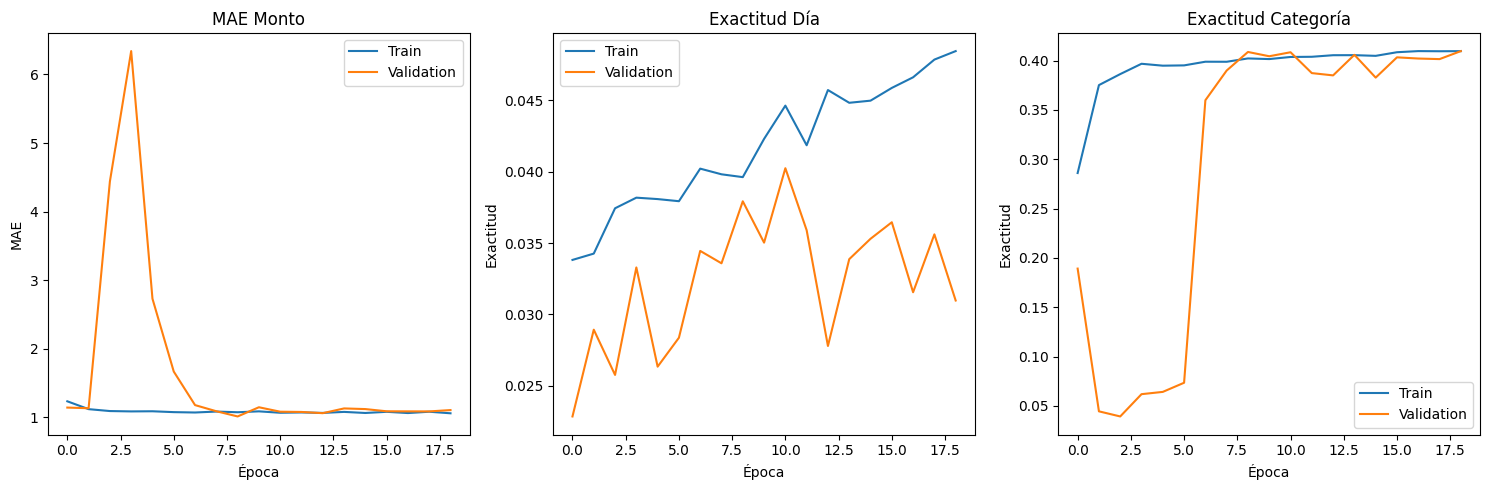


--- EVALUACIÓN DEL MODELO ---

24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - amount_output_loss: 0.6597 - amount_output_mae: 1.0042 - category_output_accuracy: 0.4105 - category_output_loss: 1.8411 - day_output_accuracy: 0.0288 - day_output_loss: 3.4654 - loss: 13.1099
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 143ms/step
MAE Monto: $38.62
  MAE Monto $0-$100: $18.06 (n=5430)
  MAE Monto $100-$500: $158.37 (n=485)
  MAE Monto $500-$1000: $637.19 (n=31)
  MAE Monto $1000-$inf: $1496.69 (n=24)
Exactitud Día: 0.0307
Exactitud Día (±1 día): 0.0923
Exactitud Día (±3 días): 0.2255
Exactitud Categoría: 0.4229
Top-3 Exactitud Categoría: 0.6998


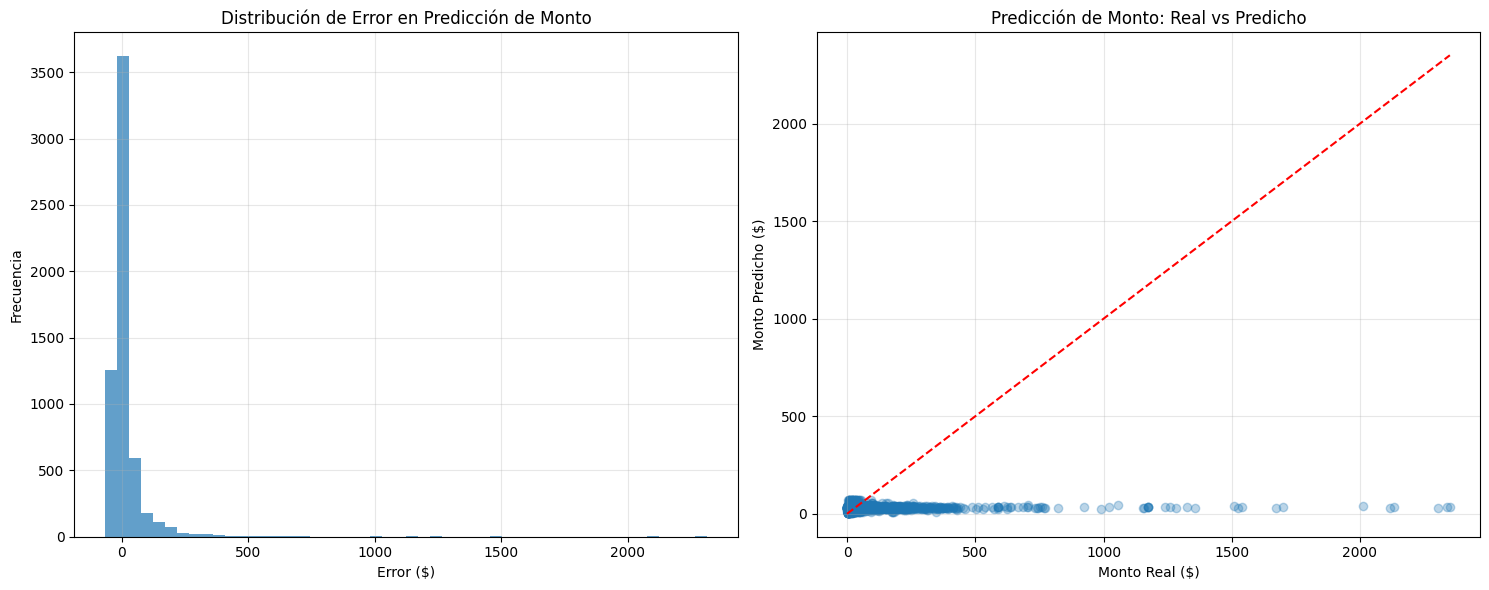

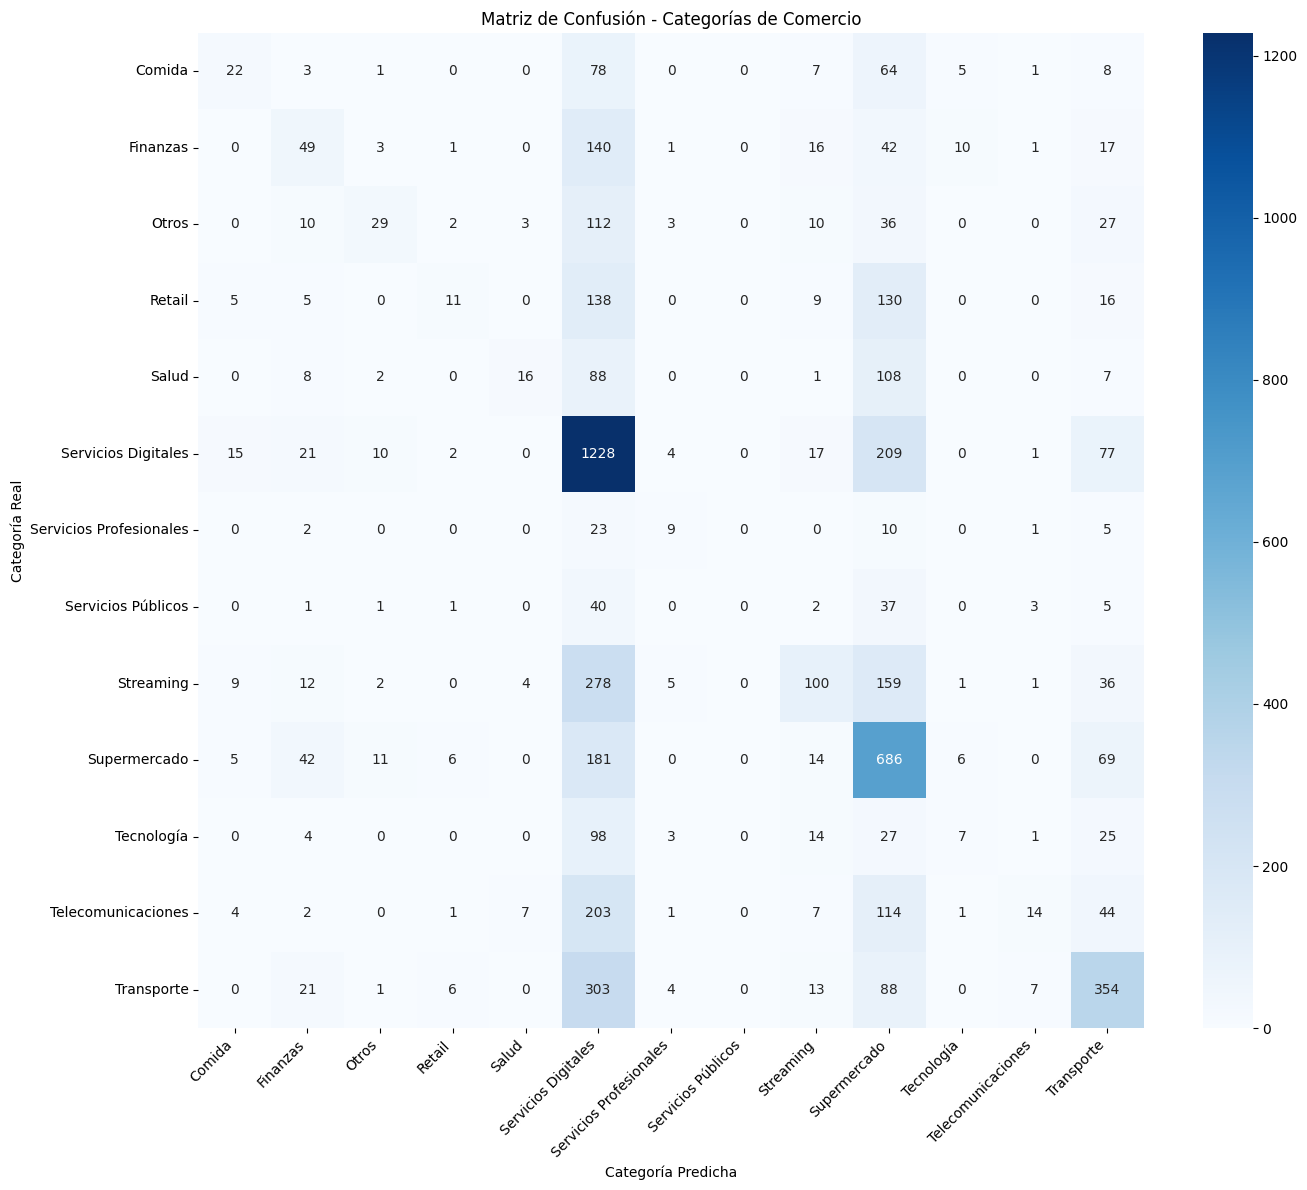

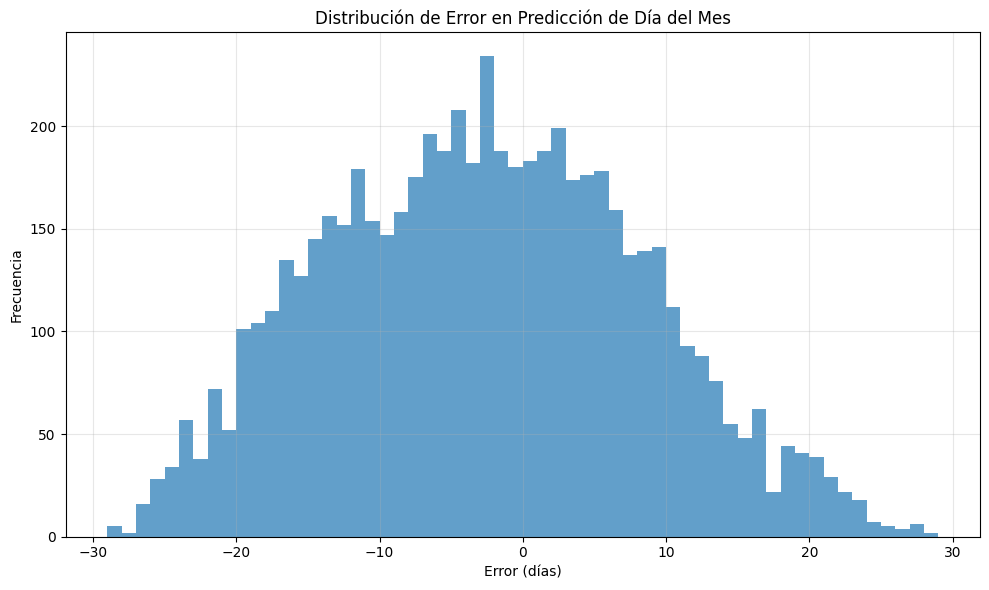


--- RESUMEN DE RENDIMIENTO DEL MODELO MEJORADO ---

Error Absoluto Medio en Monto: $38.62
Exactitud en Día del Mes: 0.0307
Exactitud en Día del Mes (±3 días): 0.2255
Exactitud en Categoría de Comercio: 0.4229
Top-3 Exactitud en Categoría: 0.6998


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import gc
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, GRU, Dropout, Concatenate, BatchNormalization
from tensorflow.keras.layers import Embedding, Attention, MultiHeadAttention, GlobalAveragePooling1D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, accuracy_score
#from tensorflow.keras.mixed_precision import experimental as mixed_precision

# Activar mixed precision para ahorrar memoria GPU
try:
    policy = mixed_precision.Policy('mixed_float16')
    mixed_precision.set_global_policy(policy)
    print('Habilitado entrenamiento con precisión mixta')
except:
    print('Precisión mixta no soportada, usando float32')

# Liberar memoria al inicio
gc.collect()
tf.keras.backend.clear_session()

# Configurar TensorFlow para crecimiento de memoria gradual
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print(f"GPUs disponibles: {len(gpus)}")
    except RuntimeError as e:
        print(e)

def load_and_prepare_data(filepath, test_size=0.2):
    """Carga y prepara los datos con mejoras en feature engineering"""
    print(f"Cargando datos desde {filepath}...")
    df = pd.read_csv(filepath)

    # Reconstruir fecha si es necesario
    if 'fecha' not in df.columns:
        df['fecha'] = pd.to_datetime(
            '2023-' + df['mes'].astype(str).str.zfill(2) + '-' +
            df['dia_mes'].astype(str).str.zfill(2)
        )

    # --- FEATURE ENGINEERING AVANZADO ---
    print("Aplicando feature engineering avanzado...")

    # 1. Features temporales
    df['dia_semana'] = df['fecha'].dt.dayofweek
    df['semana_mes'] = ((df['dia_mes'] - 1) // 7) + 1
    df['quincena'] = (df['dia_mes'] > 15).astype(int)

    # 2. Features de comportamiento de usuario
    # Ordenar por usuario y fecha
    df = df.sort_values(['id', 'fecha'])

    # Calcular estadísticas de gasto por usuario
    user_stats = df.groupby('id')['monto'].agg(['mean', 'std', 'max']).reset_index()
    user_stats.columns = ['id', 'user_mean_amount', 'user_std_amount', 'user_max_amount']

    # Calcular estadísticas por categoría de comercio
    cat_stats = df.groupby(['id', 'comercio_a_macro'])['monto'].agg(['count', 'mean']).reset_index()

    # Crear pivot table para frecuencia por categoría
    cat_freq = cat_stats.pivot_table(
        index='id',
        columns='comercio_a_macro',
        values='count',
        fill_value=0
    ).reset_index()

    # Renombrar columnas para evitar espacios
    cat_freq.columns = ['id'] + [f'freq_{col.replace(" ", "_")}' for col in cat_freq.columns[1:]]

    # Unir estadísticas al dataframe principal
    df = pd.merge(df, user_stats, on='id', how='left')
    df = pd.merge(df, cat_freq, on='id', how='left')

    # 3. Features de secuencia por usuario
    # Añadir información de la transacción anterior
    df['prev_monto'] = df.groupby('id')['monto'].shift(1)
    df['prev_comercio_macro'] = df.groupby('id')['comercio_a_macro'].shift(1)
    df['days_since_prev'] = (df['fecha'] - df.groupby('id')['fecha'].shift(1)).dt.days

    # Normalizar montos respecto al gasto promedio del usuario
    df['monto_norm_user'] = df['monto'] / df['user_mean_amount']

    # 4. Rellenar valores faltantes
    cat_cols = [col for col in df.columns if col.startswith('freq_')]
    df[cat_cols] = df[cat_cols].fillna(0)

    # Crear indicadores para valores faltantes en features de secuencia
    df['is_first_purchase'] = df['prev_monto'].isna().astype(int)
    df['prev_monto'] = df['prev_monto'].fillna(0)
    df['days_since_prev'] = df['days_since_prev'].fillna(-1)
    df['prev_comercio_macro'] = df['prev_comercio_macro'].fillna('NONE')

    # Limpiar datos
    df = df.dropna(subset=['monto', 'comercio_a_macro', 'dia_mes'])

    # Dividir en entrenamiento y prueba por usuario
    usuarios = df['id'].unique()
    np.random.seed(42)
    train_users = np.random.choice(usuarios, size=int(len(usuarios)*(1-test_size)), replace=False)

    df_train = df[df['id'].isin(train_users)]
    df_test = df[~df['id'].isin(train_users)]

    print(f"Datos de entrenamiento: {df_train.shape[0]} filas ({len(train_users)} usuarios)")
    print(f"Datos de prueba: {df_test.shape[0]} filas ({len(usuarios)-len(train_users)} usuarios)")

    return df_train, df_test

def prepare_sequences(df, sequence_length=7, max_samples_per_user=40):
    """Prepara secuencias de transacciones con mejores features"""
    print("Preparando secuencias de transacciones...")

    # Ordenar por usuario y fecha
    df = df.sort_values(['id', 'fecha'])

    # Codificar variables categóricas
    le_comercio = LabelEncoder()
    le_macro = LabelEncoder()

    df['comercio_encoded'] = le_comercio.fit_transform(df['comercio'])
    df['comercio_macro_encoded'] = le_macro.fit_transform(df['comercio_a_macro'])

    # Codificar la categoría anterior también
    unique_categories = list(df['comercio_a_macro'].unique()) + ['NONE']
    le_prev_macro = LabelEncoder()
    le_prev_macro.fit(unique_categories)
    df['prev_comercio_macro_encoded'] = le_prev_macro.transform(df['prev_comercio_macro'])

    # Encontrar columnas numéricas y categóricas para secuencias
    sequence_cols = [
        # Columnas básicas
        'comercio_encoded', 'comercio_macro_encoded',
        'monto', 'monto_norm_user',
        'tipo_Venta_binaria',
        # Features temporales
        'mes', 'dia_mes', 'dia_semana', 'quincena', 'semana_mes',
        # Features de transacción previa
        'prev_monto', 'prev_comercio_macro_encoded', 'days_since_prev',
        'is_first_purchase',
        # Features demográficas
        'edad', 'genero', 'tipo_de_persona_binario', 'id_municipio',
        # Estadísticas de usuario
        'user_mean_amount', 'user_std_amount', 'user_max_amount'
    ]

    # Añadir columnas de frecuencia de categoría
    cat_freq_cols = [col for col in df.columns if col.startswith('freq_')]
    sequence_cols.extend(cat_freq_cols)

    # Crear datasets por usuario
    user_sequences = []
    user_targets_amount = []
    user_targets_day = []
    user_targets_category = []

    # Contador para monitorear progreso
    total_users = len(df['id'].unique())
    processed = 0

    for user_id, user_data in df.groupby('id'):
        processed += 1
        if processed % 100 == 0:
            print(f"Procesando usuario {processed}/{total_users}")

        # Si el usuario tiene muy pocas transacciones, saltamos
        if len(user_data) <= sequence_length:
            continue

        # Extraer secuencias numéricas
        user_array = user_data[sequence_cols].values

        # Crear secuencias limitadas por usuario
        sample_indices = list(range(len(user_array) - sequence_length))
        if len(sample_indices) > max_samples_per_user:
            sample_indices = np.random.choice(sample_indices, max_samples_per_user, replace=False)

        for i in sample_indices:
            # Secuencia de historial: últimas n transacciones
            history_seq = user_array[i:i+sequence_length]

            # Objetivo: siguiente transacción
            next_tx = user_data.iloc[i+sequence_length]

            user_sequences.append(history_seq)
            user_targets_amount.append(next_tx['monto'])
            user_targets_day.append(next_tx['dia_mes'])
            user_targets_category.append(next_tx['comercio_macro_encoded'])

        # Limpiar memoria periódicamente
        if processed % 500 == 0:
            gc.collect()

    # Convertir a arrays numpy
    print("Convirtiendo secuencias a arrays numpy...")
    X = np.array(user_sequences, dtype=np.float32)
    y_amount = np.array(user_targets_amount, dtype=np.float32)
    y_day = np.array(user_targets_day, dtype=np.int32)
    y_category = np.array(user_targets_category, dtype=np.int32)

    # Escalar montos con RobustScaler (maneja mejor valores atípicos)
    from sklearn.preprocessing import RobustScaler
    amount_scaler = RobustScaler()
    y_amount_scaled = amount_scaler.fit_transform(y_amount.reshape(-1, 1)).flatten()

    # One-hot encoding para día del mes (1-31)
    y_day_onehot = tf.keras.utils.to_categorical(y_day - 1, num_classes=31)

    # One-hot encoding para categoría de comercio
    y_category_onehot = tf.keras.utils.to_categorical(y_category, num_classes=len(le_macro.classes_))

    print(f"Datos preparados: {len(X)} secuencias de entrada")
    print(f"Dimensiones de X: {X.shape}")

    return X, y_amount_scaled, y_day_onehot, y_category_onehot, amount_scaler, le_macro

def build_improved_model(sequence_length, n_features, n_categorias, n_dias=31):
    """Construye un modelo mejorado con arquitectura de atención"""

    # Input para secuencias de transacciones
    sequence_input = Input(shape=(sequence_length, n_features), name='sequence_input')

    # --- BLOQUE DE PROCESAMIENTO SECUENCIAL ---
    # Capas GRU Bidireccionales con skip connections
    gru1 = tf.keras.layers.Bidirectional(GRU(128, return_sequences=True))(sequence_input)
    gru1 = BatchNormalization()(gru1)

    gru2 = tf.keras.layers.Bidirectional(GRU(128, return_sequences=True))(gru1)
    gru2 = BatchNormalization()(gru2)

    # Sumar conexión residual
    gru_combined = tf.keras.layers.Add()([gru1, gru2])
    gru_combined = Dropout(0.2)(gru_combined)

    # Mecanismo de atención para enfocarse en transacciones más relevantes
    attention_layer = MultiHeadAttention(num_heads=4, key_dim=32)(gru_combined, gru_combined)
    attention_layer = BatchNormalization()(attention_layer)

    # Combinar con skip connection
    attended_gru = tf.keras.layers.Add()([gru_combined, attention_layer])

    # Pooling para obtener representación a nivel de secuencia
    sequence_features = GlobalAveragePooling1D()(attended_gru)
    sequence_features = Dense(128, activation='relu')(sequence_features)
    sequence_features = BatchNormalization()(sequence_features)
    sequence_features = Dropout(0.3)(sequence_features)

    # --- EXTRACCIÓN DE CARACTERÍSTICAS ESPECÍFICAS ---
    # Información del último estado (transacción más reciente)
    last_tx = tf.keras.layers.Lambda(lambda x: x[:, -1, :])(sequence_input)
    last_tx_features = Dense(64, activation='relu')(last_tx)
    last_tx_features = BatchNormalization()(last_tx_features)

    # Características demográficas (extraer de la última transacción)
    user_features = tf.keras.layers.Lambda(lambda x: x[:, -1, -len(cat_freq_cols)-7:-len(cat_freq_cols)])(sequence_input)
    user_dense = Dense(32, activation='relu')(user_features)
    user_dense = BatchNormalization()(user_dense)

    # Features de frecuencia de categorías
    cat_freq_features = tf.keras.layers.Lambda(lambda x: x[:, -1, -len(cat_freq_cols):])(sequence_input)
    cat_freq_dense = Dense(32, activation='relu')(cat_freq_features)
    cat_freq_dense = BatchNormalization()(cat_freq_dense)

    # --- COMBINACIÓN DE CARACTERÍSTICAS ---
    combined_features = Concatenate()([
        sequence_features,
        last_tx_features,
        user_dense,
        cat_freq_dense
    ])

    shared_dense = Dense(256, activation='relu')(combined_features)
    shared_dense = BatchNormalization()(shared_dense)
    shared_dense = Dropout(0.3)(shared_dense)

    # --- RAMAS ESPECÍFICAS PARA CADA TAREA ---

    # 1. Rama para predicción de MONTO (regresión)
    amount_dense1 = Dense(128, activation='relu')(shared_dense)
    amount_dense1 = BatchNormalization()(amount_dense1)
    amount_dense1 = Dropout(0.2)(amount_dense1)

    amount_dense2 = Dense(64, activation='relu')(amount_dense1)
    amount_dense2 = BatchNormalization()(amount_dense2)

    amount_output = Dense(1, name='amount_output')(amount_dense2)

    # 2. Rama para predicción de DÍA DEL MES (clasificación)
    # Usamos enfoque multi-modal para días (día de semana + día del mes)
    day_dense1 = Dense(128, activation='relu')(shared_dense)
    day_dense1 = BatchNormalization()(day_dense1)
    day_dense1 = Dropout(0.2)(day_dense1)

    day_dense2 = Dense(64, activation='relu')(day_dense1)
    day_dense2 = BatchNormalization()(day_dense2)

    # Salida para día del mes
    day_output = Dense(n_dias, activation='softmax', name='day_output')(day_dense2)

    # 3. Rama para predicción de CATEGORÍA (clasificación)
    category_dense1 = Dense(128, activation='relu')(shared_dense)
    category_dense1 = BatchNormalization()(category_dense1)
    category_dense1 = Dropout(0.2)(category_dense1)

    category_dense2 = Dense(64, activation='relu')(category_dense1)
    category_dense2 = BatchNormalization()(category_dense2)

    category_output = Dense(n_categorias, activation='softmax', name='category_output')(category_dense2)

    # Crear modelo completo
    model = Model(
        inputs=sequence_input,
        outputs=[amount_output, day_output, category_output]
    )

    # Compilar modelo con pérdidas y métricas apropiadas
    model.compile(
        optimizer=Adam(learning_rate=0.0005),  # Learning rate más bajo para estabilidad
        loss={
            'amount_output': 'huber',  # Huber es más robusto a outliers que MSE
            'day_output': 'categorical_crossentropy',
            'category_output': 'categorical_crossentropy'
        },
        metrics={
            'amount_output': ['mae'],
            'day_output': ['accuracy'],
            'category_output': ['accuracy']
        },
        loss_weights={
            'amount_output': 1.0,
            'day_output': 2.0,
            'category_output': 3.0
        }
    )

    return model

def train_with_generators(X_train, y_train_dict, X_val, y_val_dict, batch_size=128, epochs=30):
    """Entrena el modelo usando generadores y técnicas avanzadas"""

    # Crear generador con data augmentation
    def data_generator(X, y_dict, batch_size, augment=False):
        n_samples = X.shape[0]
        while True:
            indices = np.random.permutation(n_samples)
            for i in range(0, n_samples, batch_size):
                batch_indices = indices[i:i+batch_size]
                X_batch = X[batch_indices].copy()

                # Data augmentation (solo para entrenamiento)
                if augment:
                    # Agregar pequeño ruido aleatorio a características numéricas
                    noise_mask = np.random.normal(0, 0.01, X_batch.shape)
                    X_batch += noise_mask

                yield X_batch, {
                    'amount_output': y_dict['amount_output'][batch_indices],
                    'day_output': y_dict['day_output'][batch_indices],
                    'category_output': y_dict['category_output'][batch_indices]
                }

    # Parámetros del modelo
    sequence_length = X_train.shape[1]
    n_features = X_train.shape[2]
    n_categorias = y_train_dict['category_output'].shape[1]

    # Construir modelo
    model = build_improved_model(
        sequence_length=sequence_length,
        n_features=n_features,
        n_categorias=n_categorias
    )

    print(model.summary())

    # Callbacks más robustos
    callbacks = [
        EarlyStopping(
            monitor='val_loss',
            patience=8,
            restore_best_weights=True,
            verbose=1
        ),
        ModelCheckpoint(
            'best_transaction_model.h5',
            monitor='val_loss',
            save_best_only=True,
            verbose=1
        ),
        ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=4,
            min_lr=0.00001,
            verbose=1
        ),
        # Callbacks personalizados para monitoreo específico
        tf.keras.callbacks.LambdaCallback(
            on_epoch_end=lambda epoch, logs: print(f"\nÉpoca {epoch+1}: "
                                               f"Categoría: {logs.get('category_output_accuracy'):.4f}, "
                                               f"Día: {logs.get('day_output_accuracy'):.4f}, "
                                               f"Monto MAE: {logs.get('amount_output_mae'):.4f}")
        )
    ]

    # Calculamos pasos por época e iteraciones de validación
    steps_per_epoch = X_train.shape[0] // batch_size
    validation_steps = X_val.shape[0] // batch_size

    # Entrenar con generadores y data augmentation
    history = model.fit(
        data_generator(X_train, y_train_dict, batch_size, augment=True),
        steps_per_epoch=steps_per_epoch,
        validation_data=data_generator(X_val, y_val_dict, batch_size, augment=False),
        validation_steps=validation_steps,
        epochs=epochs,
        callbacks=callbacks,
        verbose=1
    )

    return model, history

def evaluate_model(model, X_test, y_test_dict, amount_scaler, le_macro, detailed=True):
    """Evalúa el modelo con métricas más detalladas"""

    print("\n--- EVALUACIÓN DEL MODELO ---\n")

    # Evaluar en conjunto de prueba
    evaluation = model.evaluate(
        X_test,
        y_test_dict,
        batch_size=256,
        verbose=1
    )

    # Obtener predicciones
    amount_pred, day_pred, category_pred = model.predict(X_test, batch_size=256)

    # Métricas para monto
    y_amount_true = amount_scaler.inverse_transform(y_test_dict['amount_output'].reshape(-1, 1)).flatten()
    y_amount_pred = amount_scaler.inverse_transform(amount_pred).flatten()

    mae_amount = np.mean(np.abs(y_amount_true - y_amount_pred))
    print(f"MAE Monto: ${mae_amount:.2f}")

    # Análisis por rango de montos
    monto_ranges = [(0, 100), (100, 500), (500, 1000), (1000, float('inf'))]
    for low, high in monto_ranges:
        mask = (y_amount_true >= low) & (y_amount_true < high)
        if mask.sum() > 0:
            range_mae = np.mean(np.abs(y_amount_true[mask] - y_amount_pred[mask]))
            print(f"  MAE Monto ${low}-${high}: ${range_mae:.2f} (n={mask.sum()})")

    # Métricas para día
    y_day_true = np.argmax(y_test_dict['day_output'], axis=1) + 1
    y_day_pred = np.argmax(day_pred, axis=1) + 1

    day_accuracy = np.mean(y_day_true == y_day_pred)
    day_accuracy_margin1 = np.mean(np.abs(y_day_true - y_day_pred) <= 1)
    day_accuracy_margin3 = np.mean(np.abs(y_day_true - y_day_pred) <= 3)

    print(f"Exactitud Día: {day_accuracy:.4f}")
    print(f"Exactitud Día (±1 día): {day_accuracy_margin1:.4f}")
    print(f"Exactitud Día (±3 días): {day_accuracy_margin3:.4f}")

    # Métricas para categoría
    y_category_true = np.argmax(y_test_dict['category_output'], axis=1)
    y_category_pred = np.argmax(category_pred, axis=1)

    category_accuracy = np.mean(y_category_true == y_category_pred)
    print(f"Exactitud Categoría: {category_accuracy:.4f}")

    # Top-3 accuracy para categoría
    top3_accuracy = 0
    for i in range(len(y_category_true)):
        # Obtener las 3 categorías con mayor probabilidad
        top3 = category_pred[i].argsort()[-3:][::-1]
        if y_category_true[i] in top3:
            top3_accuracy += 1
    top3_accuracy /= len(y_category_true)

    print(f"Top-3 Exactitud Categoría: {top3_accuracy:.4f}")

    # Matriz de confusión y más visualizaciones si detailed=True
    if detailed:
        from sklearn.metrics import confusion_matrix, classification_report

        # Matriz de confusión para categorías
        cm = confusion_matrix(y_category_true, y_category_pred)
        category_names = le_macro.classes_

        # Visualización de resultados
        plt.figure(figsize=(15, 6))

        # Histograma de errores de monto
        plt.subplot(1, 2, 1)
        plt.hist(y_amount_true - y_amount_pred, bins=50, alpha=0.7)
        plt.title('Distribución de Error en Predicción de Monto')
        plt.xlabel('Error ($)')
        plt.ylabel('Frecuencia')
        plt.grid(True, alpha=0.3)

        # Gráfico de dispersión de montos reales vs predichos
        plt.subplot(1, 2, 2)
        plt.scatter(y_amount_true, y_amount_pred, alpha=0.3)
        plt.plot([0, np.max(y_amount_true)], [0, np.max(y_amount_true)], 'r--')
        plt.xlabel('Monto Real ($)')
        plt.ylabel('Monto Predicho ($)')
        plt.title('Predicción de Monto: Real vs Predicho')
        plt.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

        # Matriz de confusión para categorías
        plt.figure(figsize=(14, 12))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=category_names, yticklabels=category_names)
        plt.title('Matriz de Confusión - Categorías de Comercio')
        plt.ylabel('Categoría Real')
        plt.xlabel('Categoría Predicha')
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()

        # Distribución de error en predicción de días
        plt.figure(figsize=(10, 6))
        day_errors = y_day_true - y_day_pred
        plt.hist(day_errors, bins=range(min(day_errors), max(day_errors)+2), alpha=0.7)
        plt.title('Distribución de Error en Predicción de Día del Mes')
        plt.xlabel('Error (días)')
        plt.ylabel('Frecuencia')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

    return {
        'mae_amount': mae_amount,
        'day_accuracy': day_accuracy,
        'day_accuracy_margin3': day_accuracy_margin3,
        'category_accuracy': category_accuracy,
        'category_top3_accuracy': top3_accuracy
    }

# Función principal optimizada y mejorada
def main():
    # Cargar datos con feature engineering mejorado
    df_train, df_test = load_and_prepare_data('/content/drive/MyDrive/Datathon/df_models.csv')

    # Obtener lista de columnas de frecuencia de categoría para usar en el modelo
    global cat_freq_cols
    cat_freq_cols = [col for col in df_train.columns if col.startswith('freq_')]

    # Usar secuencias más largas para capturar mejor patrones temporales
    seq_length = 7  # Aumentado de 5 a 7

    # Preparar secuencias para entrenamiento (aumentar muestras por usuario)
    X_train, y_amount_train, y_day_train, y_category_train, amount_scaler, le_macro = prepare_sequences(
        df_train, sequence_length=seq_length, max_samples_per_user=30
    )

    # Preparar secuencias para prueba
    X_test, y_amount_test, y_day_test, y_category_test, _, _ = prepare_sequences(
        df_test, sequence_length=seq_length, max_samples_per_user=30
    )

    # Liberar memoria después de preparar datos
    del df_train, df_test
    gc.collect()

    # Preparar diccionarios para entrenamiento y validación
    # Dividimos entrenamiento en train/val
    X_tr, X_val, y_amount_tr, y_amount_val, y_day_tr, y_day_val, y_category_tr, y_category_val = train_test_split(
        X_train, y_amount_train, y_day_train, y_category_train, test_size=0.15, random_state=42
    )

    # Crear diccionarios para alimentar al modelo
    y_train_dict = {
        'amount_output': y_amount_tr,
        'day_output': y_day_tr,
        'category_output': y_category_tr
    }

    y_val_dict = {
        'amount_output': y_amount_val,
        'day_output': y_day_val,
        'category_output': y_category_val
    }

    y_test_dict = {
        'amount_output': y_amount_test,
        'day_output': y_day_test,
        'category_output': y_category_test
    }

    # Liberar más memoria
    del X_train, y_amount_train, y_day_train, y_category_train
    gc.collect()

    # Entrenar modelo con generadores para optimizar memoria
    print("\n--- ENTRENANDO MODELO MEJORADO ---\n")
    model, history = train_with_generators(
        X_tr, y_train_dict,
        X_val, y_val_dict,
        batch_size=128,
        epochs=30  # Más épocas pero con early stopping
    )

    # Visualizar historia de entrenamiento
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.plot(history.history['amount_output_mae'], label='Train')
    plt.plot(history.history['val_amount_output_mae'], label='Validation')
    plt.title('MAE Monto')
    plt.xlabel('Época')
    plt.ylabel('MAE')
    plt.legend()

    plt.subplot(1, 3, 2)
    plt.plot(history.history['day_output_accuracy'], label='Train')
    plt.plot(history.history['val_day_output_accuracy'], label='Validation')
    plt.title('Exactitud Día')
    plt.xlabel('Época')
    plt.ylabel('Exactitud')
    plt.legend()

    plt.subplot(1, 3, 3)
    plt.plot(history.history['category_output_accuracy'], label='Train')
    plt.plot(history.history['val_category_output_accuracy'], label='Validation')
    plt.title('Exactitud Categoría')
    plt.xlabel('Época')
    plt.ylabel('Exactitud')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Evaluar en conjunto de prueba
    metrics = evaluate_model(model, X_test, y_test_dict, amount_scaler, le_macro, detailed=True)

    # Guardar modelo final
    model.save('modelo_prediccion_mejorado.h5')

    print("\n--- RESUMEN DE RENDIMIENTO DEL MODELO MEJORADO ---\n")
    print(f"Error Absoluto Medio en Monto: ${metrics['mae_amount']:.2f}")
    print(f"Exactitud en Día del Mes: {metrics['day_accuracy']:.4f}")
    print(f"Exactitud en Día del Mes (±3 días): {metrics['day_accuracy_margin3']:.4f}")
    print(f"Exactitud en Categoría de Comercio: {metrics['category_accuracy']:.4f}")
    print(f"Top-3 Exactitud en Categoría: {metrics['category_top3_accuracy']:.4f}")

    return model, amount_scaler, le_macro

# Ejecutar
if __name__ == "__main__":
    main()

Cargando datos desde /content/drive/MyDrive/Datathon/df_models.csv...
Aplicando feature engineering avanzado...
Datos de entrenamiento: 278050 filas (796 usuarios)
Datos de prueba: 65929 filas (199 usuarios)
Número total de características: 61
Preparando secuencias de transacciones...
Usando 58 características para secuencias
Procesando usuario 100/796
Procesando usuario 200/796
Procesando usuario 300/796
Procesando usuario 400/796
Procesando usuario 500/796
Procesando usuario 600/796
Procesando usuario 700/796
Convirtiendo secuencias a arrays numpy...
Datos preparados: 31811 secuencias de entrada
Dimensiones de X: (31811, 10, 58)
Distribución de días: Min=1, Max=31, Media=16.03
Preparando secuencias de transacciones...
Usando 58 características para secuencias
Procesando usuario 100/199
Convirtiendo secuencias a arrays numpy...
Datos preparados: 7952 secuencias de entrada
Dimensiones de X: (7952, 10, 58)
Distribución de días: Min=1, Max=31, Media=16.34

--- ENTRENANDO MODELO ULTRA-OPT

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ sequence_input      │ (None, 10, 58)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 10, 58)    │     30,138 │ sequence_input[0… │
│ (MultiHeadAttentio… │                   │            │ sequence_input[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 10, 58)    │          0 │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 10, 58)    │          0 │ sequence_input[0… │
│                     │                   │            │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 10, 58)    │        116 │ add[0][0]         │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 10, 256)   │     15,104 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 10, 256)   │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 10, 58)    │     14,906 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 10, 58)    │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 10, 58)    │          0 │ layer_normalizat… │
│                     │                   │            │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 10, 58)    │        116 │ add_1[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 10, 58)    │     30,138 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 10, 58)    │          0 │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 10, 58)    │          0 │ layer_normalizat… │
│                     │                   │            │ dropout_5[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 10, 58)    │        116 │ add_2[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 10, 256)   │     15,104 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 10, 256)   │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 10, 58)    │     14,906 │ dropout_6[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_7 (Dropout) │ (None, 10, 58)    │          0 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 10, 58)    │          0 │ layer_normalizat… │
│                     │                   │            │ dropout_7[0][0] 

 Total params: 2,370,549 (9.04 MB)

 Trainable params: 2,364,801 (9.02 MB)

 Non-trainable params: 5,748 (22.45 KB)

None
Epoch 1/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 603ms/step - amount_output_loss: 1.0908 - amount_output_mae: 1.4941 - category_output_accuracy: 0.0839 - category_output_loss: 3.0536 - day_cos_output_loss: 1.0048 - day_cos_output_mae: 0.8077 - day_output_accuracy: 0.0325 - day_output_loss: 3.8022 - day_sin_output_loss: 1.0293 - day_sin_output_mae: 0.8103 - loss: 19.8899
Epoch 1: val_loss improved from inf to 16.42534, saving model to best_transaction_model_ultra.h5



Época 1: Categoría: 0.0980, Día: 0.0343, Monto MAE: 1.4182
211/211 ━━━━━━━━━━━━━━━━━━━━ 186s 676ms/step - amount_output_loss: 1.0905 - amount_output_mae: 1.4938 - category_output_accuracy: 0.0840 - category_output_loss: 3.0527 - day_cos_output_loss: 1.0037 - day_cos_output_mae: 0.8073 - day_output_accuracy: 0.0325 - day_output_loss: 3.8015 - day_sin_output_loss: 1.0281 - day_sin_output_mae: 0.8099 - loss: 19.8833 - val_amount_output_loss: 0.7140 - val_amount_output_mae: 1.0758 - val_category_output_accuracy: 0.0656 - val_category_output_loss: 2.4871 - val_day_cos_output_loss: 0.5209 - val_day_cos_output_mae: 0.6435 - val_day_output_accuracy: 0.0375 - val_day_output_loss: 3.5329 - val_day_sin_output_loss: 0.6609 - val_day_sin_output_mae: 0.6973 - val_loss: 16.4253 - learning_rate: 3.0000e-04
Epoch 2/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 609ms/step - amount_output_loss: 0.9009 - amount_output_mae: 1.2864 - category_output_accuracy: 0.1406 - category_output_loss: 2.5732 - day_cos_output_los


Época 2: Categoría: 0.1566, Día: 0.0335, Monto MAE: 1.2606
211/211 ━━━━━━━━━━━━━━━━━━━━ 140s 663ms/step - amount_output_loss: 0.9008 - amount_output_mae: 1.2862 - category_output_accuracy: 0.1407 - category_output_loss: 2.5730 - day_cos_output_loss: 0.5688 - day_cos_output_mae: 0.6597 - day_output_accuracy: 0.0344 - day_output_loss: 3.5016 - day_sin_output_loss: 0.5495 - day_sin_output_mae: 0.6532 - loss: 16.7410 - val_amount_output_loss: 0.7121 - val_amount_output_mae: 1.0496 - val_category_output_accuracy: 0.2515 - val_category_output_loss: 2.3411 - val_day_cos_output_loss: 0.5040 - val_day_cos_output_mae: 0.6340 - val_day_output_accuracy: 0.0325 - val_day_output_loss: 3.4629 - val_day_sin_output_loss: 0.5201 - val_day_sin_output_mae: 0.6476 - val_loss: 15.6804 - learning_rate: 3.0000e-04
Epoch 3/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 600ms/step - amount_output_loss: 0.8074 - amount_output_mae: 1.1773 - category_output_accuracy: 0.1913 - category_output_loss: 2.3972 - day_cos_output_los


Época 3: Categoría: 0.1999, Día: 0.0353, Monto MAE: 1.1789
211/211 ━━━━━━━━━━━━━━━━━━━━ 138s 653ms/step - amount_output_loss: 0.8075 - amount_output_mae: 1.1773 - category_output_accuracy: 0.1913 - category_output_loss: 2.3971 - day_cos_output_loss: 0.5211 - day_cos_output_mae: 0.6416 - day_output_accuracy: 0.0354 - day_output_loss: 3.4678 - day_sin_output_loss: 0.5286 - day_sin_output_mae: 0.6477 - loss: 15.9956 - val_amount_output_loss: 0.7395 - val_amount_output_mae: 1.0344 - val_category_output_accuracy: 0.2515 - val_category_output_loss: 2.3287 - val_day_cos_output_loss: 0.5044 - val_day_cos_output_mae: 0.6362 - val_day_output_accuracy: 0.0308 - val_day_output_loss: 3.4544 - val_day_sin_output_loss: 0.5094 - val_day_sin_output_mae: 0.6425 - val_loss: 15.6380 - learning_rate: 3.0000e-04
Epoch 4/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 582ms/step - amount_output_loss: 0.8237 - amount_output_mae: 1.1734 - category_output_accuracy: 0.2139 - category_output_loss: 2.3274 - day_cos_output_los


Época 6: Categoría: 0.2293, Día: 0.0366, Monto MAE: 1.0876
211/211 ━━━━━━━━━━━━━━━━━━━━ 132s 627ms/step - amount_output_loss: 0.7612 - amount_output_mae: 1.1028 - category_output_accuracy: 0.2249 - category_output_loss: 2.2771 - day_cos_output_loss: 0.5063 - day_cos_output_mae: 0.6368 - day_output_accuracy: 0.0361 - day_output_loss: 3.4503 - day_sin_output_loss: 0.5141 - day_sin_output_mae: 0.6440 - loss: 15.5107 - val_amount_output_loss: 0.7124 - val_amount_output_mae: 1.0675 - val_category_output_accuracy: 0.1718 - val_category_output_loss: 2.2643 - val_day_cos_output_loss: 0.5003 - val_day_cos_output_mae: 0.6363 - val_day_output_accuracy: 0.0325 - val_day_output_loss: 3.4457 - val_day_sin_output_loss: 0.5075 - val_day_sin_output_mae: 0.6421 - val_loss: 15.4014 - learning_rate: 3.0000e-04
Epoch 7/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 591ms/step - amount_output_loss: 0.7587 - amount_output_mae: 1.0992 - category_output_accuracy: 0.2408 - category_output_loss: 2.2493 - day_cos_output_los


Época 7: Categoría: 0.2358, Día: 0.0353, Monto MAE: 1.0798
211/211 ━━━━━━━━━━━━━━━━━━━━ 135s 642ms/step - amount_output_loss: 0.7587 - amount_output_mae: 1.0991 - category_output_accuracy: 0.2408 - category_output_loss: 2.2493 - day_cos_output_loss: 0.5056 - day_cos_output_mae: 0.6381 - day_output_accuracy: 0.0367 - day_output_loss: 3.4443 - day_sin_output_loss: 0.5066 - day_sin_output_mae: 0.6405 - loss: 15.4140 - val_amount_output_loss: 0.7117 - val_amount_output_mae: 1.0604 - val_category_output_accuracy: 0.2515 - val_category_output_loss: 2.2314 - val_day_cos_output_loss: 0.5111 - val_day_cos_output_mae: 0.6403 - val_day_output_accuracy: 0.0304 - val_day_output_loss: 3.4411 - val_day_sin_output_loss: 0.5082 - val_day_sin_output_mae: 0.6416 - val_loss: 15.3058 - learning_rate: 3.0000e-04
Epoch 8/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 602ms/step - amount_output_loss: 0.7076 - amount_output_mae: 1.0380 - category_output_accuracy: 0.2361 - category_output_loss: 2.2387 - day_cos_output_los


Época 9: Categoría: 0.2408, Día: 0.0378, Monto MAE: 1.0630
211/211 ━━━━━━━━━━━━━━━━━━━━ 134s 637ms/step - amount_output_loss: 0.7401 - amount_output_mae: 1.0655 - category_output_accuracy: 0.2392 - category_output_loss: 2.2298 - day_cos_output_loss: 0.5032 - day_cos_output_mae: 0.6350 - day_output_accuracy: 0.0377 - day_output_loss: 3.4395 - day_sin_output_loss: 0.5079 - day_sin_output_mae: 0.6422 - loss: 15.3068 - val_amount_output_loss: 0.7117 - val_amount_output_mae: 1.0540 - val_category_output_accuracy: 0.2515 - val_category_output_loss: 2.2279 - val_day_cos_output_loss: 0.4997 - val_day_cos_output_mae: 0.6353 - val_day_output_accuracy: 0.0371 - val_day_output_loss: 3.4367 - val_day_sin_output_loss: 0.5051 - val_day_sin_output_mae: 0.6402 - val_loss: 15.2713 - learning_rate: 3.0000e-04
Epoch 10/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 609ms/step - amount_output_loss: 0.7169 - amount_output_mae: 1.0547 - category_output_accuracy: 0.2387 - category_output_loss: 2.2300 - day_cos_output_lo


Época 13: Categoría: 0.2456, Día: 0.0379, Monto MAE: 1.0469
211/211 ━━━━━━━━━━━━━━━━━━━━ 135s 639ms/step - amount_output_loss: 0.7130 - amount_output_mae: 1.0494 - category_output_accuracy: 0.2459 - category_output_loss: 2.2260 - day_cos_output_loss: 0.5027 - day_cos_output_mae: 0.6368 - day_output_accuracy: 0.0357 - day_output_loss: 3.4346 - day_sin_output_loss: 0.5023 - day_sin_output_mae: 0.6399 - loss: 15.2676 - val_amount_output_loss: 0.7117 - val_amount_output_mae: 1.0531 - val_category_output_accuracy: 0.2515 - val_category_output_loss: 2.2172 - val_day_cos_output_loss: 0.5037 - val_day_cos_output_mae: 0.6361 - val_day_output_accuracy: 0.0352 - val_day_output_loss: 3.4397 - val_day_sin_output_loss: 0.5027 - val_day_sin_output_mae: 0.6411 - val_loss: 15.2499 - learning_rate: 3.0000e-04
Epoch 14/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 596ms/step - amount_output_loss: 0.7607 - amount_output_mae: 1.0934 - category_output_accuracy: 0.2532 - category_output_loss: 2.2201 - day_cos_output_l


Época 19: Categoría: 0.2503, Día: 0.0389, Monto MAE: 1.0519
211/211 ━━━━━━━━━━━━━━━━━━━━ 137s 650ms/step - amount_output_loss: 0.7060 - amount_output_mae: 1.0478 - category_output_accuracy: 0.2521 - category_output_loss: 2.2071 - day_cos_output_loss: 0.4993 - day_cos_output_mae: 0.6350 - day_output_accuracy: 0.0398 - day_output_loss: 3.4328 - day_sin_output_loss: 0.5027 - day_sin_output_mae: 0.6394 - loss: 15.1972 - val_amount_output_loss: 0.7134 - val_amount_output_mae: 1.0439 - val_category_output_accuracy: 0.2515 - val_category_output_loss: 2.2209 - val_day_cos_output_loss: 0.4957 - val_day_cos_output_mae: 0.6325 - val_day_output_accuracy: 0.0354 - val_day_output_loss: 3.4329 - val_day_sin_output_loss: 0.5043 - val_day_sin_output_mae: 0.6418 - val_loss: 15.2395 - learning_rate: 1.5000e-04
Epoch 20/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 593ms/step - amount_output_loss: 0.7191 - amount_output_mae: 1.0583 - category_output_accuracy: 0.2513 - category_output_loss: 2.2173 - day_cos_output_l


Época 20: Categoría: 0.2499, Día: 0.0392, Monto MAE: 1.0464
211/211 ━━━━━━━━━━━━━━━━━━━━ 146s 694ms/step - amount_output_loss: 0.7190 - amount_output_mae: 1.0583 - category_output_accuracy: 0.2513 - category_output_loss: 2.2173 - day_cos_output_loss: 0.4999 - day_cos_output_mae: 0.6347 - day_output_accuracy: 0.0399 - day_output_loss: 3.4288 - day_sin_output_loss: 0.5029 - day_sin_output_mae: 0.6404 - loss: 15.2321 - val_amount_output_loss: 0.7116 - val_amount_output_mae: 1.0548 - val_category_output_accuracy: 0.2515 - val_category_output_loss: 2.2175 - val_day_cos_output_loss: 0.4965 - val_day_cos_output_mae: 0.6332 - val_day_output_accuracy: 0.0356 - val_day_output_loss: 3.4318 - val_day_sin_output_loss: 0.5033 - val_day_sin_output_mae: 0.6410 - val_loss: 15.2263 - learning_rate: 1.5000e-04
Epoch 21/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 595ms/step - amount_output_loss: 0.7550 - amount_output_mae: 1.0928 - category_output_accuracy: 0.2521 - category_output_loss: 2.2196 - day_cos_output_l


Época 24: Categoría: 0.2505, Día: 0.0381, Monto MAE: 1.0606
211/211 ━━━━━━━━━━━━━━━━━━━━ 135s 639ms/step - amount_output_loss: 0.7013 - amount_output_mae: 1.0370 - category_output_accuracy: 0.2510 - category_output_loss: 2.2078 - day_cos_output_loss: 0.4976 - day_cos_output_mae: 0.6338 - day_output_accuracy: 0.0383 - day_output_loss: 3.4303 - day_sin_output_loss: 0.5033 - day_sin_output_mae: 0.6406 - loss: 15.1859 - val_amount_output_loss: 0.7126 - val_amount_output_mae: 1.0470 - val_category_output_accuracy: 0.2515 - val_category_output_loss: 2.2145 - val_day_cos_output_loss: 0.4959 - val_day_cos_output_mae: 0.6328 - val_day_output_accuracy: 0.0335 - val_day_output_loss: 3.4335 - val_day_sin_output_loss: 0.5035 - val_day_sin_output_mae: 0.6414 - val_loss: 15.2225 - learning_rate: 1.5000e-04
Epoch 25/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 584ms/step - amount_output_loss: 0.6957 - amount_output_mae: 1.0342 - category_output_accuracy: 0.2482 - category_output_loss: 2.2132 - day_cos_output_l


Época 28: Categoría: 0.2490, Día: 0.0391, Monto MAE: 1.0475
211/211 ━━━━━━━━━━━━━━━━━━━━ 135s 637ms/step - amount_output_loss: 0.7105 - amount_output_mae: 1.0501 - category_output_accuracy: 0.2490 - category_output_loss: 2.2126 - day_cos_output_loss: 0.4958 - day_cos_output_mae: 0.6315 - day_output_accuracy: 0.0397 - day_output_loss: 3.4306 - day_sin_output_loss: 0.5053 - day_sin_output_mae: 0.6419 - loss: 15.2120 - val_amount_output_loss: 0.7123 - val_amount_output_mae: 1.0486 - val_category_output_accuracy: 0.2515 - val_category_output_loss: 2.2123 - val_day_cos_output_loss: 0.4981 - val_day_cos_output_mae: 0.6348 - val_day_output_accuracy: 0.0352 - val_day_output_loss: 3.4339 - val_day_sin_output_loss: 0.5034 - val_day_sin_output_mae: 0.6412 - val_loss: 15.2182 - learning_rate: 1.5000e-04
Epoch 29/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 588ms/step - amount_output_loss: 0.7281 - amount_output_mae: 1.0702 - category_output_accuracy: 0.2578 - category_output_loss: 2.2036 - day_cos_output_l


Época 34: Categoría: 0.2526, Día: 0.0401, Monto MAE: 1.0451
211/211 ━━━━━━━━━━━━━━━━━━━━ 139s 657ms/step - amount_output_loss: 0.6889 - amount_output_mae: 1.0290 - category_output_accuracy: 0.2511 - category_output_loss: 2.2178 - day_cos_output_loss: 0.5003 - day_cos_output_mae: 0.6354 - day_output_accuracy: 0.0413 - day_output_loss: 3.4300 - day_sin_output_loss: 0.5024 - day_sin_output_mae: 0.6394 - loss: 15.2018 - val_amount_output_loss: 0.7117 - val_amount_output_mae: 1.0542 - val_category_output_accuracy: 0.2515 - val_category_output_loss: 2.2133 - val_day_cos_output_loss: 0.4957 - val_day_cos_output_mae: 0.6323 - val_day_output_accuracy: 0.0354 - val_day_output_loss: 3.4319 - val_day_sin_output_loss: 0.5022 - val_day_sin_output_mae: 0.6407 - val_loss: 15.2131 - learning_rate: 7.5000e-05
Epoch 35/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 583ms/step - amount_output_loss: 0.7014 - amount_output_mae: 1.0413 - category_output_accuracy: 0.2459 - category_output_loss: 2.2148 - day_cos_output_l


Época 38: Categoría: 0.2527, Día: 0.0378, Monto MAE: 1.0671
211/211 ━━━━━━━━━━━━━━━━━━━━ 136s 643ms/step - amount_output_loss: 0.7254 - amount_output_mae: 1.0687 - category_output_accuracy: 0.2535 - category_output_loss: 2.2053 - day_cos_output_loss: 0.4966 - day_cos_output_mae: 0.6329 - day_output_accuracy: 0.0366 - day_output_loss: 3.4276 - day_sin_output_loss: 0.5019 - day_sin_output_mae: 0.6411 - loss: 15.1963 - val_amount_output_loss: 0.7121 - val_amount_output_mae: 1.0499 - val_category_output_accuracy: 0.2515 - val_category_output_loss: 2.2119 - val_day_cos_output_loss: 0.4965 - val_day_cos_output_mae: 0.6329 - val_day_output_accuracy: 0.0339 - val_day_output_loss: 3.4329 - val_day_sin_output_loss: 0.5035 - val_day_sin_output_mae: 0.6416 - val_loss: 15.2124 - learning_rate: 7.5000e-05
Epoch 39/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 593ms/step - amount_output_loss: 0.6950 - amount_output_mae: 1.0310 - category_output_accuracy: 0.2456 - category_output_loss: 2.2135 - day_cos_output_l


Época 45: Categoría: 0.2540, Día: 0.0407, Monto MAE: 1.0642
211/211 ━━━━━━━━━━━━━━━━━━━━ 135s 637ms/step - amount_output_loss: 0.7587 - amount_output_mae: 1.1005 - category_output_accuracy: 0.2552 - category_output_loss: 2.2144 - day_cos_output_loss: 0.4924 - day_cos_output_mae: 0.6281 - day_output_accuracy: 0.0387 - day_output_loss: 3.4282 - day_sin_output_loss: 0.5072 - day_sin_output_mae: 0.6440 - loss: 15.2558 - val_amount_output_loss: 0.7120 - val_amount_output_mae: 1.0506 - val_category_output_accuracy: 0.2515 - val_category_output_loss: 2.2120 - val_day_cos_output_loss: 0.4957 - val_day_cos_output_mae: 0.6325 - val_day_output_accuracy: 0.0369 - val_day_output_loss: 3.4318 - val_day_sin_output_loss: 0.5021 - val_day_sin_output_mae: 0.6406 - val_loss: 15.2089 - learning_rate: 3.7500e-05
Epoch 46/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 593ms/step - amount_output_loss: 0.7208 - amount_output_mae: 1.0582 - category_output_accuracy: 0.2512 - category_output_loss: 2.2067 - day_cos_output_l

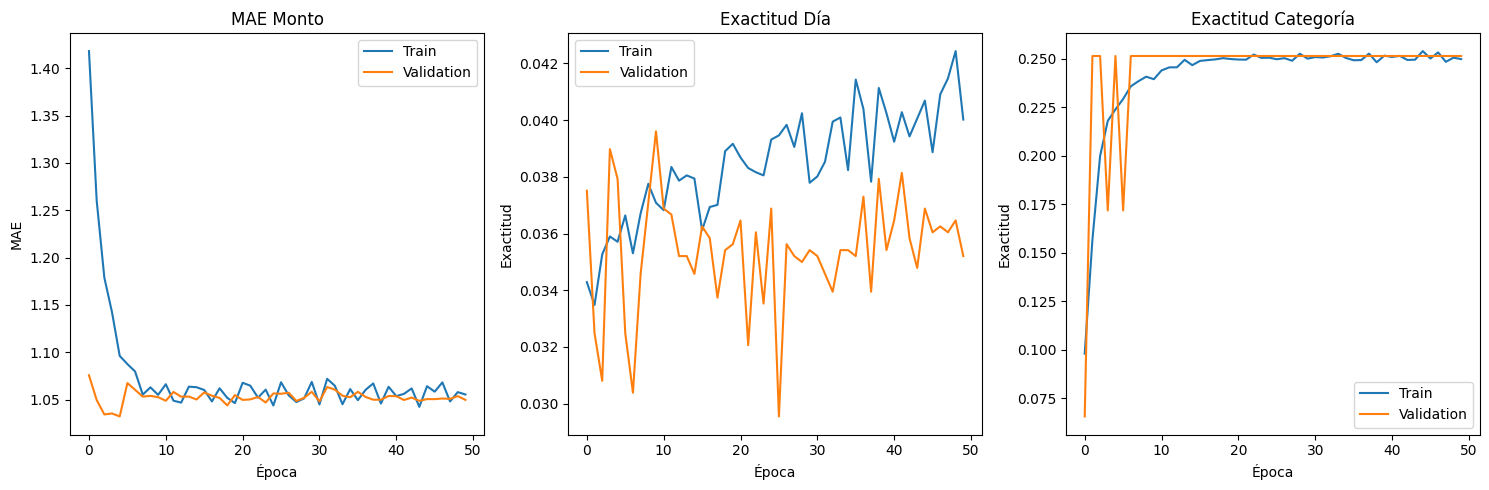


--- EVALUACIÓN DEL MODELO ULTRA-OPTIMIZADO ---

32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 264ms/step - amount_output_loss: 0.7809 - amount_output_mae: 1.1240 - category_output_accuracy: 0.2494 - category_output_loss: 2.2372 - day_cos_output_loss: 0.5095 - day_cos_output_mae: 0.6434 - day_output_accuracy: 0.0377 - day_output_loss: 3.4350 - day_sin_output_loss: 0.4895 - day_sin_output_mae: 0.6287 - loss: 15.3618
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 322ms/step
Usando predicción de día por clasificación (mejor rendimiento)
MAE Monto: $39.16
  MAE Monto $0-$100: $17.29 (n=7159)
  MAE Monto $100-$500: $159.05 (n=711)
  MAE Monto $500-$1000: $674.13 (n=59)
  MAE Monto $1000-$inf: $1512.83 (n=23)
R² para predicción de monto: -0.0326
Exactitud Día: 0.0404
Exactitud Día (±1 día): 0.1136
Exactitud Día (±2 días): 0.1818
Exactitud Día (±3 días): 0.2480
Error Absoluto Medio Circular (días): 7.50
Exactitud Categoría: 0.2577
Top-3 Exactitud Categoría: 0.5468


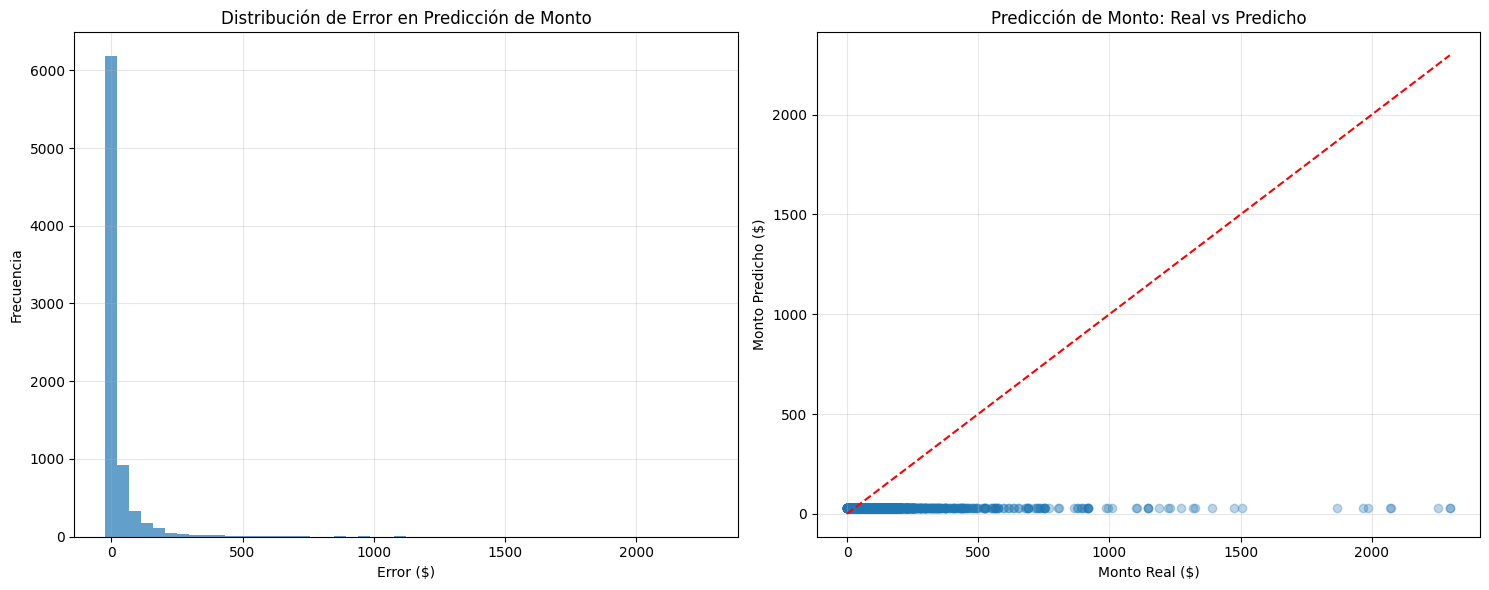

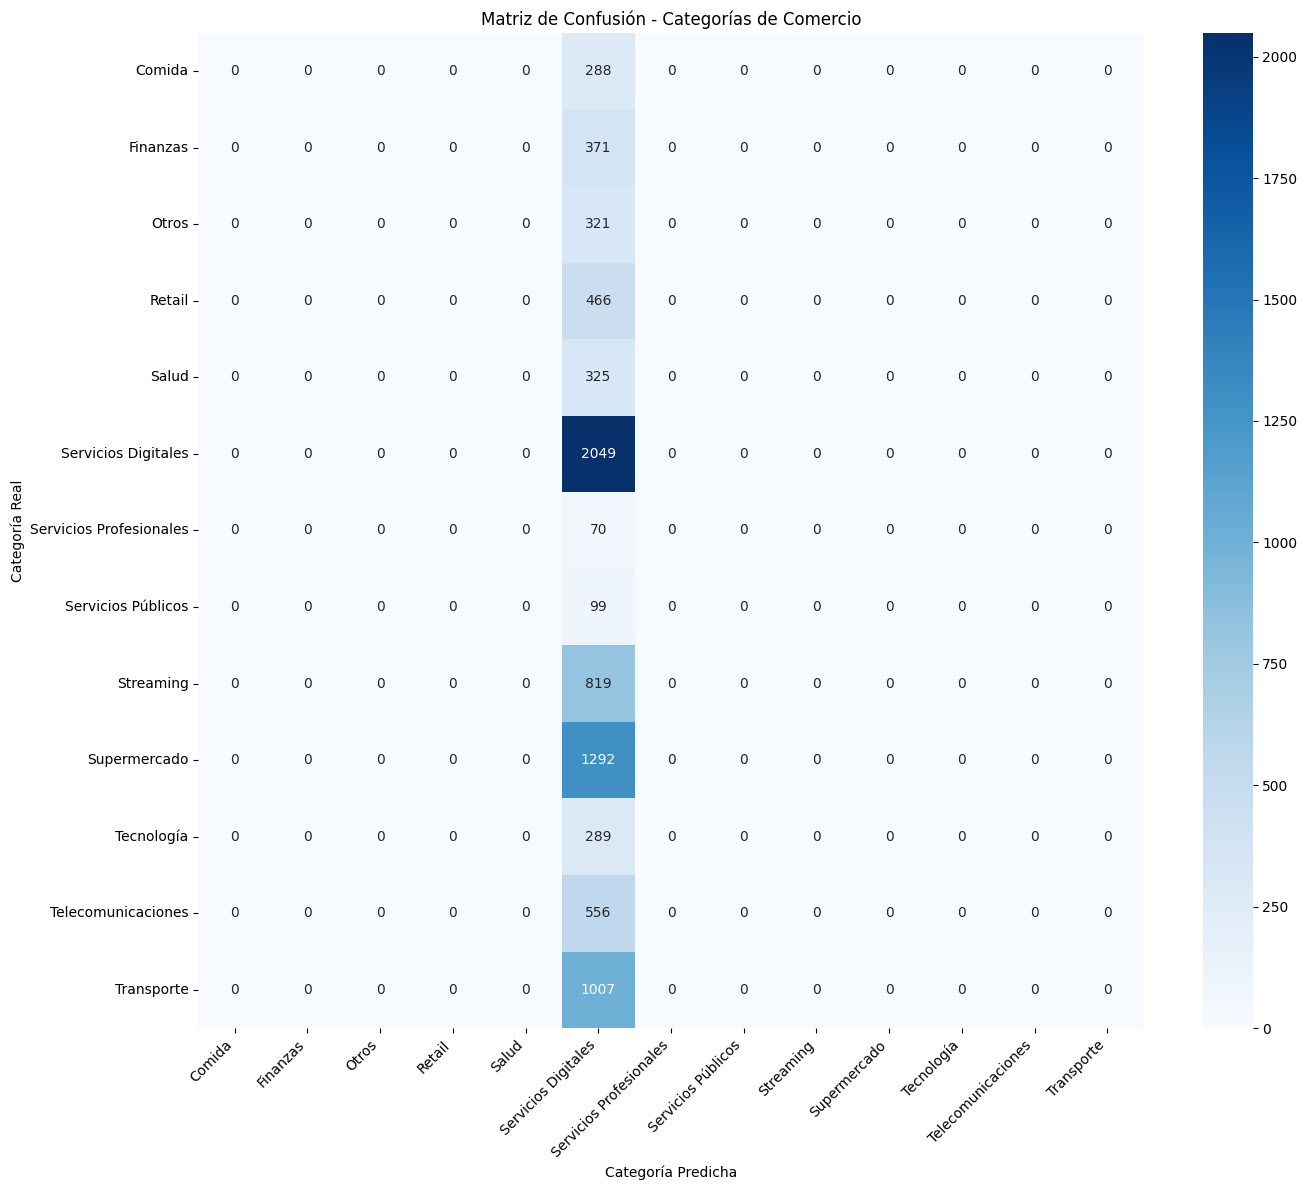

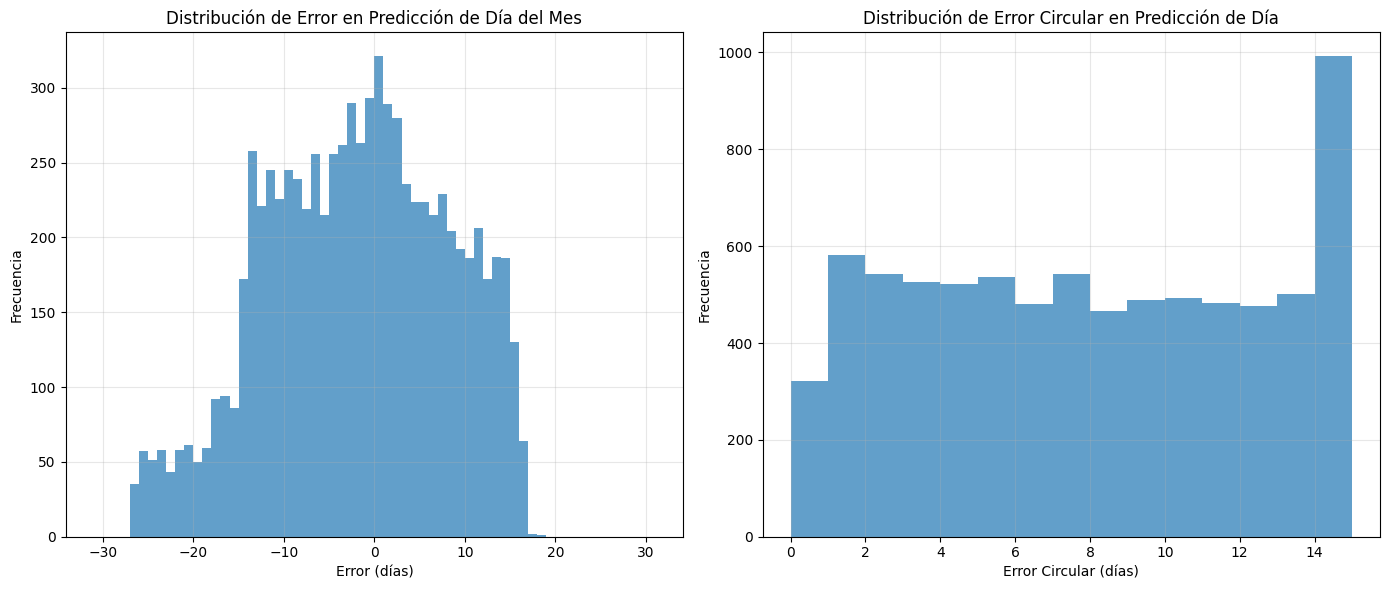

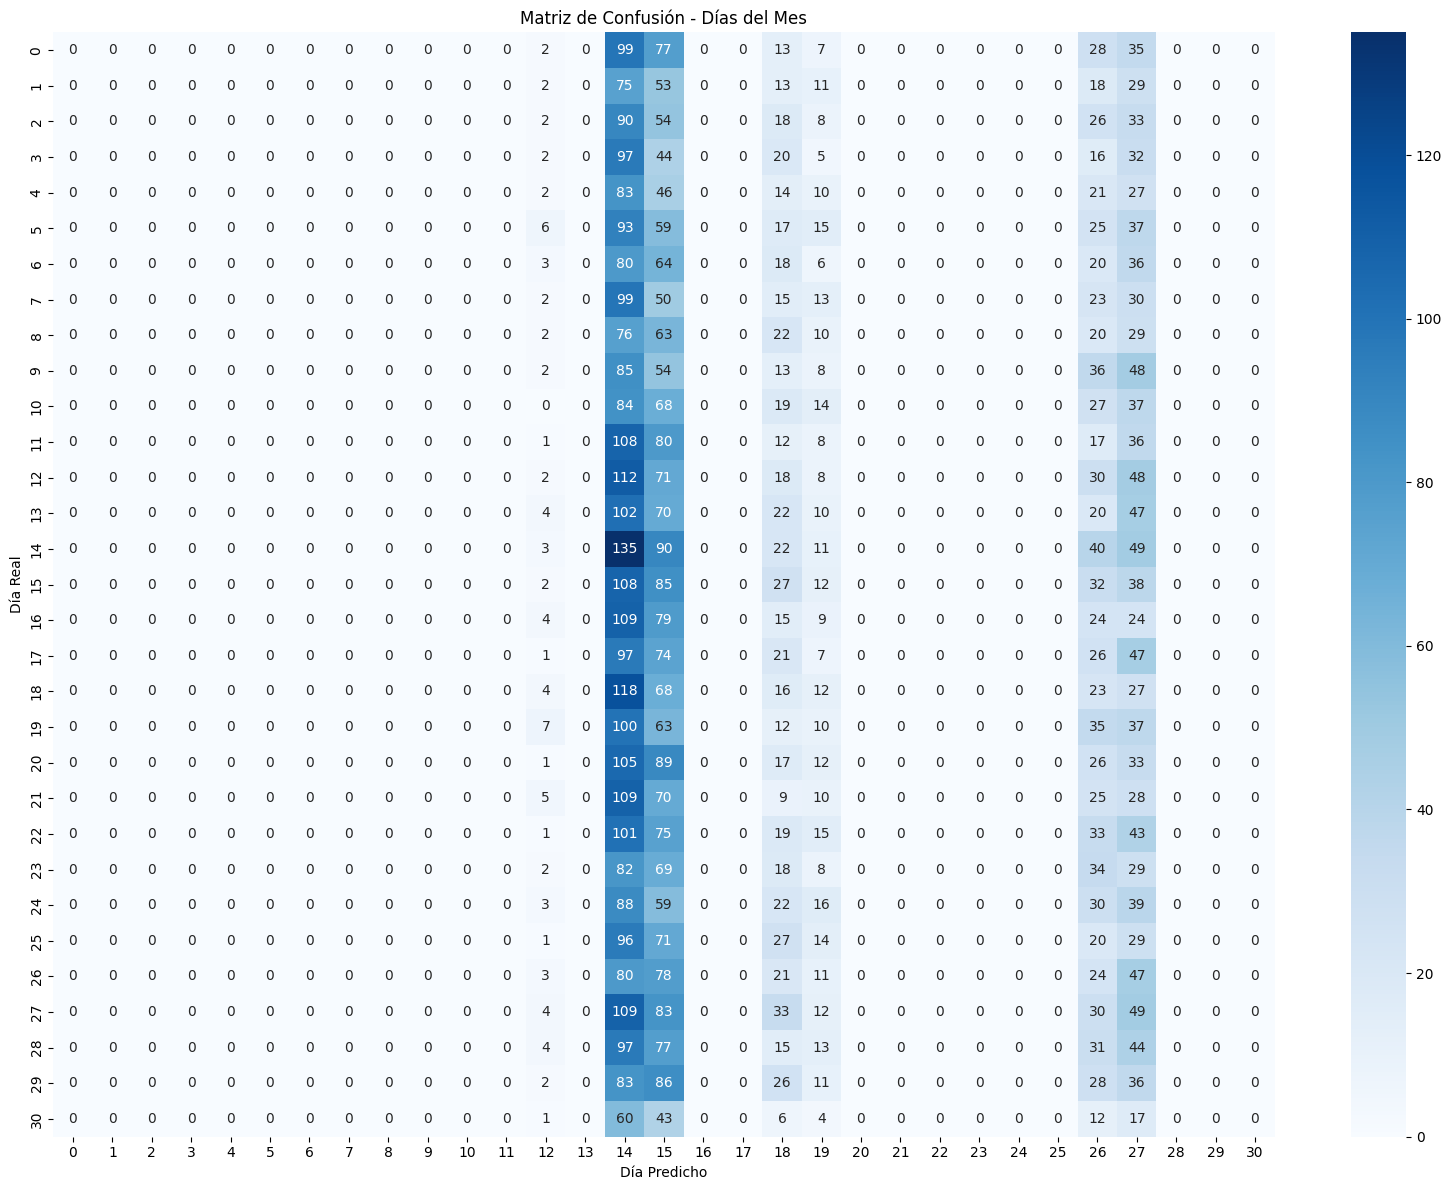

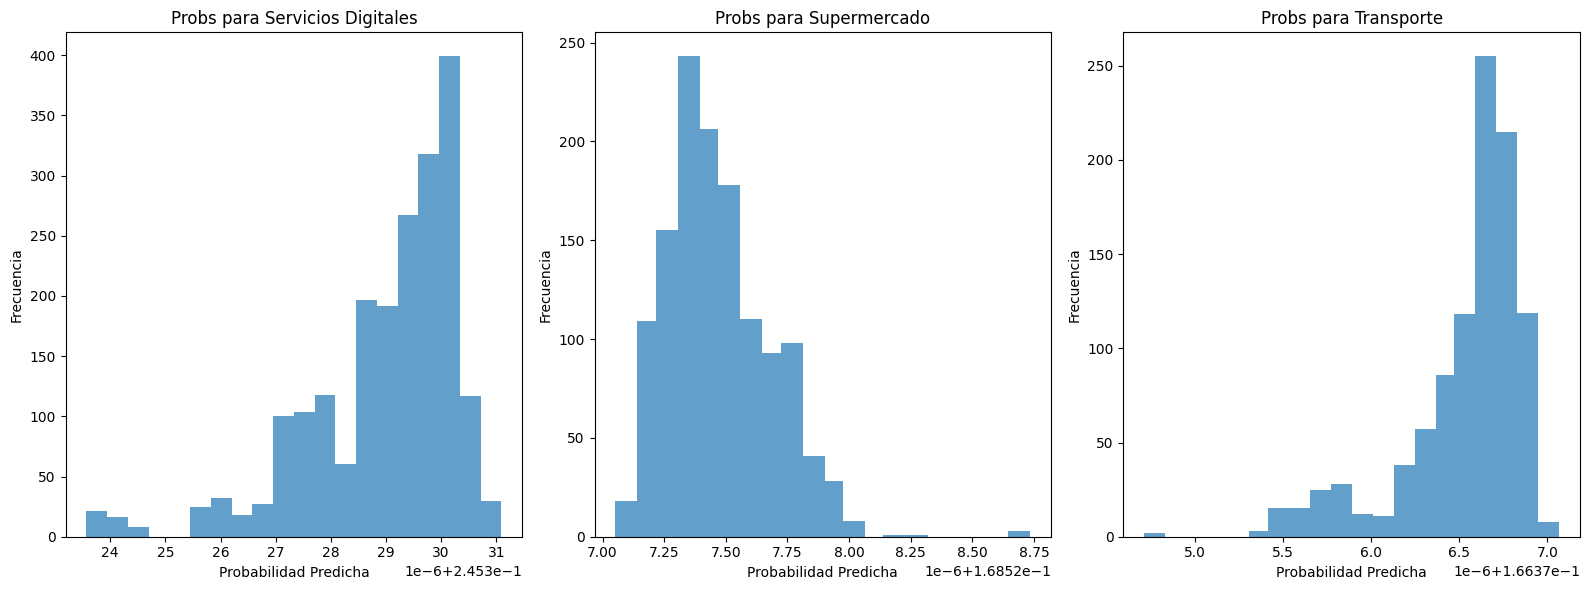


--- RESUMEN DE RENDIMIENTO DEL MODELO ULTRA-OPTIMIZADO ---

Error Absoluto Medio en Monto: $39.16
R² para Monto: -0.0326
Exactitud en Día del Mes: 0.0404
Exactitud en Día del Mes (±1 día): 0.1136
Exactitud en Día del Mes (±3 días): 0.2480
Error Circular en Días: 7.50
Exactitud en Categoría de Comercio: 0.2577
Top-3 Exactitud en Categoría: 0.5468


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import gc
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, GRU, LSTM, Dropout, Concatenate, BatchNormalization
from tensorflow.keras.layers import Embedding, MultiHeadAttention, GlobalAveragePooling1D, Conv1D
from tensorflow.keras.layers import Add, LayerNormalization, TimeDistributed, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.utils import class_weight
import random

# Liberar memoria al inicio
gc.collect()
tf.keras.backend.clear_session()

# Configurar TensorFlow para crecimiento de memoria gradual
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print(f"GPUs disponibles: {len(gpus)}")
    except RuntimeError as e:
        print(e)

# Fijar semillas para reproducibilidad
def set_seeds(seed=42):
    np.random.seed(seed)
    random.seed(seed)
    tf.random.set_seed(seed)

set_seeds(42)

def load_and_prepare_data(filepath, test_size=0.2):
    """Carga y prepara los datos con features avanzados"""
    print(f"Cargando datos desde {filepath}...")
    df = pd.read_csv(filepath)

    # Reconstruir fecha si es necesario
    if 'fecha' not in df.columns:
        df['fecha'] = pd.to_datetime(
            '2023-' + df['mes'].astype(str).str.zfill(2) + '-' +
            df['dia_mes'].astype(str).str.zfill(2)
        )

    # --- FEATURE ENGINEERING ULTRA-AVANZADO ---
    print("Aplicando feature engineering avanzado...")

    # 1. Features temporales - añadimos características circulares
    df['dia_semana'] = df['fecha'].dt.dayofweek
    df['semana_mes'] = ((df['dia_mes'] - 1) // 7) + 1
    df['quincena'] = (df['dia_mes'] > 15).astype(int)

    # Codificación circular para el día del mes (para capturar ciclicidad)
    df['dia_mes_sin'] = np.sin(2 * np.pi * df['dia_mes'] / 31)
    df['dia_mes_cos'] = np.cos(2 * np.pi * df['dia_mes'] / 31)

    # Codificación circular para el día de la semana
    df['dia_semana_sin'] = np.sin(2 * np.pi * df['dia_semana'] / 7)
    df['dia_semana_cos'] = np.cos(2 * np.pi * df['dia_semana'] / 7)

    # Codificación circular para el mes
    df['mes_sin'] = np.sin(2 * np.pi * df['mes'] / 12)
    df['mes_cos'] = np.cos(2 * np.pi * df['mes'] / 12)

    # 2. Features de patrones recurrentes de usuario
    # Ordenar por usuario y fecha
    df = df.sort_values(['id', 'fecha'])

    # Calcular estadísticas de gasto por usuario
    user_stats = df.groupby('id')['monto'].agg(['mean', 'std', 'max', 'count']).reset_index()
    user_stats.columns = ['id', 'user_mean_amount', 'user_std_amount', 'user_max_amount', 'user_tx_count']

    # Calcular estadísticas por categoría de comercio
    cat_stats = df.groupby(['id', 'comercio_a_macro'])['monto'].agg(['count', 'mean']).reset_index()

    # Crear pivot table para frecuencia por categoría
    cat_freq = cat_stats.pivot_table(
        index='id',
        columns='comercio_a_macro',
        values='count',
        fill_value=0
    ).reset_index()

    # Renombrar columnas para evitar espacios
    cat_freq.columns = ['id'] + [f'freq_{col.replace(" ", "_")}' for col in cat_freq.columns[1:]]

    # 3. Features de patrones periódicos y estacionalidad

    # Detectar frecuencia de compras por día del mes para cada usuario
    day_freq = df.groupby(['id', 'dia_mes']).size().reset_index(name='day_freq')
    day_freq = day_freq.pivot_table(index='id', columns='dia_mes', values='day_freq', fill_value=0)
    day_freq.columns = [f'day_freq_{col}' for col in day_freq.columns]

    # Preprocesar frecuencia de días para reducir dimensionalidad
    day_groups = [
        ([1,2,3,4,5], 'day_freq_early_month'),
        ([6,7,8,9,10], 'day_freq_early_mid_month'),
        ([11,12,13,14,15], 'day_freq_mid_month'),
        ([16,17,18,19,20], 'day_freq_late_mid_month'),
        ([21,22,23,24,25], 'day_freq_late_month'),
        ([26,27,28,29,30,31], 'day_freq_end_month')
    ]

    # Crear características agregadas de frecuencia de días
    day_freq_agg = pd.DataFrame(index=day_freq.index)
    for days, name in day_groups:
        cols = [f'day_freq_{d}' for d in days if f'day_freq_{d}' in day_freq.columns]
        if cols:
            day_freq_agg[name] = day_freq[cols].sum(axis=1)

    # Unir con el dataframe principal
    df = pd.merge(df, user_stats, on='id', how='left')
    df = pd.merge(df, cat_freq, on='id', how='left')
    df = pd.merge(df, day_freq_agg.reset_index(), on='id', how='left')

    # 4. Features de secuencia por usuario - más detallados
    # Añadir información de las dos transacciones anteriores
    df['prev_monto'] = df.groupby('id')['monto'].shift(1)
    df['prev2_monto'] = df.groupby('id')['monto'].shift(2)

    df['prev_comercio_macro'] = df.groupby('id')['comercio_a_macro'].shift(1)
    df['prev2_comercio_macro'] = df.groupby('id')['comercio_a_macro'].shift(2)

    df['prev_dia_mes'] = df.groupby('id')['dia_mes'].shift(1)
    df['prev2_dia_mes'] = df.groupby('id')['dia_mes'].shift(2)

    df['days_since_prev'] = (df['fecha'] - df.groupby('id')['fecha'].shift(1)).dt.days
    df['days_since_prev2'] = (df['fecha'] - df.groupby('id')['fecha'].shift(2)).dt.days

    # 5. Features de estacionalidad específicos por usuario
    # Calcular ventanas de tiempo preferidas para cada usuario
    time_windows = []
    for _, user_df in df.groupby('id'):
        if len(user_df) > 3:  # Solo para usuarios con suficientes datos
            user_id = user_df['id'].iloc[0]

            # Calcular ventanas de día del mes
            day_counts = user_df['dia_mes'].value_counts()
            peak_days = day_counts.nlargest(3).index.tolist()

            time_windows.append({
                'id': user_id,
                'peak_day1': peak_days[0] if len(peak_days) > 0 else -1,
                'peak_day2': peak_days[1] if len(peak_days) > 1 else -1,
                'peak_day3': peak_days[2] if len(peak_days) > 2 else -1,
            })

    if time_windows:
        time_windows_df = pd.DataFrame(time_windows)
        df = pd.merge(df, time_windows_df, on='id', how='left')

    # 6. Features relacionales - edad vs categoría, etc.
    # Calcular tasas de compra por categoría según características demográficas
    df['age_norm'] = df['edad'] / df['edad'].max()
    df['age_group'] = pd.cut(df['edad'], bins=[0, 25, 35, 45, 55, 100], labels=[0, 1, 2, 3, 4])

    # Normalizar montos respecto al promedio del usuario
    df['monto_norm_user'] = df['monto'] / df['user_mean_amount']
    df['monto_zscore'] = (df['monto'] - df['user_mean_amount']) / (df['user_std_amount'] + 1e-5)

    # 7. Rellenar valores faltantes
    # Crear indicadores para valores faltantes en features de secuencia
    df['is_first_purchase'] = df['prev_monto'].isna().astype(int)
    df['is_second_purchase'] = (~df['prev_monto'].isna() & df['prev2_monto'].isna()).astype(int)

    # Rellenar valores faltantes en columnas de frecuencia
    cat_cols = [col for col in df.columns if col.startswith('freq_') or col.startswith('day_freq_')]
    df[cat_cols] = df[cat_cols].fillna(0)

    # Rellenar valores faltantes en features de secuencia
    df['prev_monto'] = df['prev_monto'].fillna(0)
    df['prev2_monto'] = df['prev2_monto'].fillna(0)
    df['days_since_prev'] = df['days_since_prev'].fillna(-1)
    df['days_since_prev2'] = df['days_since_prev2'].fillna(-1)
    df['prev_comercio_macro'] = df['prev_comercio_macro'].fillna('NONE')
    df['prev2_comercio_macro'] = df['prev2_comercio_macro'].fillna('NONE')
    df['prev_dia_mes'] = df['prev_dia_mes'].fillna(-1)
    df['prev2_dia_mes'] = df['prev2_dia_mes'].fillna(-1)

    # Rellenar valores faltantes en otras columnas
    peak_day_cols = ['peak_day1', 'peak_day2', 'peak_day3']
    if all(col in df.columns for col in peak_day_cols):
        for col in peak_day_cols:
            df[col] = df[col].fillna(-1)

    # 8. Limpiar datos
    df = df.dropna(subset=['monto', 'comercio_a_macro', 'dia_mes'])

    # Dividir en entrenamiento y prueba por usuario
    usuarios = df['id'].unique()
    np.random.seed(42)
    train_users = np.random.choice(usuarios, size=int(len(usuarios)*(1-test_size)), replace=False)

    df_train = df[df['id'].isin(train_users)]
    df_test = df[~df['id'].isin(train_users)]

    print(f"Datos de entrenamiento: {df_train.shape[0]} filas ({len(train_users)} usuarios)")
    print(f"Datos de prueba: {df_test.shape[0]} filas ({len(usuarios)-len(train_users)} usuarios)")
    print(f"Número total de características: {df.shape[1]}")

    return df_train, df_test

def prepare_sequences(df, sequence_length=10, max_samples_per_user=40):
    """Prepara secuencias de transacciones con features avanzados"""
    print("Preparando secuencias de transacciones...")

    # Ordenar por usuario y fecha
    df = df.sort_values(['id', 'fecha'])

    # Codificar variables categóricas
    le_comercio = LabelEncoder()
    le_macro = LabelEncoder()

    df['comercio_encoded'] = le_comercio.fit_transform(df['comercio'])
    df['comercio_macro_encoded'] = le_macro.fit_transform(df['comercio_a_macro'])

    # Codificar la categoría anterior también
    unique_categories = list(df['comercio_a_macro'].unique()) + ['NONE']
    le_prev_macro = LabelEncoder()
    le_prev_macro.fit(unique_categories)
    df['prev_comercio_macro_encoded'] = le_prev_macro.transform(df['prev_comercio_macro'])
    df['prev2_comercio_macro_encoded'] = le_prev_macro.transform(df['prev2_comercio_macro'])

    # Seleccionar columnas para secuencias, especificando tipos para optimizar memoria
    numeric_cols = []
    categorical_cols = []
    temporal_cols = []

    # Identificar columnas por tipo
    for col in df.columns:
        if col in ['comercio_encoded', 'comercio_macro_encoded',
                   'prev_comercio_macro_encoded', 'prev2_comercio_macro_encoded']:
            categorical_cols.append(col)
        elif col in ['dia_mes', 'dia_semana', 'mes', 'semana_mes', 'quincena',
                    'dia_mes_sin', 'dia_mes_cos', 'dia_semana_sin', 'dia_semana_cos',
                    'mes_sin', 'mes_cos', 'prev_dia_mes', 'prev2_dia_mes']:
            temporal_cols.append(col)
        elif df[col].dtype in [np.float64, np.float32, np.int64, np.int32] and col not in [
            'id', 'fecha', 'next_purchase_date', 'days_to_next', 'next_comercio', 'next_comercio_encoded']:
            numeric_cols.append(col)

    # Crear secuencias
    sequence_cols = numeric_cols + categorical_cols + temporal_cols

    print(f"Usando {len(sequence_cols)} características para secuencias")

    # Crear datasets por usuario
    user_sequences = []
    user_targets_amount = []
    user_targets_day = []
    user_targets_category = []
    user_targets_day_sin = []
    user_targets_day_cos = []

    # Para balanceo de días
    all_days = []

    # Contador para monitorear progreso
    total_users = len(df['id'].unique())
    processed = 0

    for user_id, user_data in df.groupby('id'):
        processed += 1
        if processed % 100 == 0:
            print(f"Procesando usuario {processed}/{total_users}")

        # Si el usuario tiene muy pocas transacciones, saltamos
        if len(user_data) <= sequence_length:
            continue

        # Extraer secuencias numéricas
        user_array = user_data[sequence_cols].values

        # Crear secuencias limitadas por usuario
        sample_indices = list(range(len(user_array) - sequence_length))
        if len(sample_indices) > max_samples_per_user:
            sample_indices = np.random.choice(sample_indices, max_samples_per_user, replace=False)

        for i in sample_indices:
            # Secuencia de historial: últimas n transacciones
            history_seq = user_array[i:i+sequence_length]

            # Objetivo: siguiente transacción
            next_tx = user_data.iloc[i+sequence_length]

            # Almacenar targets
            day = next_tx['dia_mes']
            all_days.append(day)

            user_sequences.append(history_seq)
            user_targets_amount.append(next_tx['monto'])
            user_targets_day.append(day)
            user_targets_category.append(next_tx['comercio_macro_encoded'])

            # Targets circulares para día
            user_targets_day_sin.append(np.sin(2 * np.pi * day / 31))
            user_targets_day_cos.append(np.cos(2 * np.pi * day / 31))

        # Limpiar memoria periódicamente
        if processed % 500 == 0:
            gc.collect()

    # Convertir a arrays numpy
    print("Convirtiendo secuencias a arrays numpy...")
    X = np.array(user_sequences, dtype=np.float32)
    y_amount = np.array(user_targets_amount, dtype=np.float32)
    y_day = np.array(user_targets_day, dtype=np.int32)
    y_category = np.array(user_targets_category, dtype=np.int32)
    y_day_sin = np.array(user_targets_day_sin, dtype=np.float32)
    y_day_cos = np.array(user_targets_day_cos, dtype=np.float32)

    # Calcular pesos para balanceo de clases para días
    day_class_weights = class_weight.compute_class_weight(
        class_weight='balanced',
        classes=np.unique(y_day),
        y=y_day
    )
    day_class_weight_dict = {i: weight for i, weight in enumerate(day_class_weights, 1)}

    # Escalar montos con RobustScaler (maneja mejor valores atípicos)
    from sklearn.preprocessing import RobustScaler
    amount_scaler = RobustScaler()
    y_amount_scaled = amount_scaler.fit_transform(y_amount.reshape(-1, 1)).flatten()

    # One-hot encoding para día del mes (1-31)
    y_day_onehot = tf.keras.utils.to_categorical(y_day - 1, num_classes=31)

    # One-hot encoding para categoría de comercio
    y_category_onehot = tf.keras.utils.to_categorical(y_category, num_classes=len(le_macro.classes_))

    print(f"Datos preparados: {len(X)} secuencias de entrada")
    print(f"Dimensiones de X: {X.shape}")
    print(f"Distribución de días: Min={np.min(y_day)}, Max={np.max(y_day)}, Media={np.mean(y_day):.2f}")

    # Estructura de datos mejorada
    return {
        'X': X,
        'y_amount': y_amount_scaled,
        'y_amount_raw': y_amount,
        'y_day': y_day,
        'y_day_onehot': y_day_onehot,
        'y_category': y_category,
        'y_category_onehot': y_category_onehot,
        'y_day_sin': y_day_sin,
        'y_day_cos': y_day_cos,
        'amount_scaler': amount_scaler,
        'le_macro': le_macro,
        'day_class_weights': day_class_weight_dict,
        'sequence_cols': sequence_cols,
        'numeric_cols': numeric_cols,
        'categorical_cols': categorical_cols,
        'temporal_cols': temporal_cols
    }

def transformer_encoder_block(inputs, head_size, num_heads, ff_dim, dropout=0.1):
    """Bloque encoder de transformer optimizado"""
    # Multi-head self attention
    attention_output = MultiHeadAttention(
        num_heads=num_heads, key_dim=head_size
    )(inputs, inputs)
    attention_output = Dropout(dropout)(attention_output)
    attention_output = LayerNormalization(epsilon=1e-6)(inputs + attention_output)

    # Feed-forward network
    ffn_output = Dense(ff_dim, activation="relu")(attention_output)
    ffn_output = Dropout(dropout)(ffn_output)
    ffn_output = Dense(inputs.shape[-1])(ffn_output)
    ffn_output = Dropout(dropout)(ffn_output)

    # Skip connection and normalization
    return LayerNormalization(epsilon=1e-6)(attention_output + ffn_output)

def day_prediction_module(x, config):
    """Módulo especializado para predicción de día con formas de tensores corregidas"""

    # Extracción de características temporales con mayor capacidad
    # Aplicar GlobalAveragePooling para reducir la dimensión de secuencia primero
    x_temporal_flat = GlobalAveragePooling1D()(x)
    x_temporal = Dense(config['dense_units']*2, activation='relu')(x_temporal_flat)
    x_temporal = BatchNormalization()(x_temporal)

    # 1. Rama de CNN para detectar patrones locales
    x_cnn = Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(x)
    x_cnn = BatchNormalization()(x_cnn)
    x_cnn = Conv1D(filters=128, kernel_size=5, activation='relu', padding='same')(x_cnn)
    x_cnn = BatchNormalization()(x_cnn)
    x_cnn = GlobalAveragePooling1D()(x_cnn)  # Reduce a (None, 128)

    # 2. Rama de LSTM para patrones secuenciales
    x_lstm = LSTM(config['lstm_units']*2, return_sequences=True)(x)
    x_lstm = LSTM(config['lstm_units']*2, return_sequences=False)(x_lstm)  # Ya es (None, 256)
    x_lstm = BatchNormalization()(x_lstm)

    # 3. Rama de atención para identificar transacciones relevantes
    attn = MultiHeadAttention(num_heads=8, key_dim=32)(x, x)
    attn = GlobalAveragePooling1D()(attn)  # Reduce a (None, dim)
    attn = BatchNormalization()(attn)

    # Ahora todos los tensores tienen forma (None, dim) y se pueden concatenar
    x_combined = Concatenate()([x_temporal, x_cnn, x_lstm, attn])

    # Red neuronal profunda para días
    x = Dense(512, activation='relu')(x_combined)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)
    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)
    x = Dense(128, activation='relu')(x)
    x = BatchNormalization()(x)

    # Salidas para enfoque dual
    day_class = Dense(31, activation='softmax', name='day_output')(x)
    day_sin = Dense(1, activation='linear', name='day_sin_output')(x)
    day_cos = Dense(1, activation='linear', name='day_cos_output')(x)

    return day_class, day_sin, day_cos

def build_ultra_optimized_model(sequence_length, n_features, n_categorias,
                             config=None, day_class_weights=None):
    """Construye modelo ensamblado ultra-optimizado para mejor rendimiento"""

    # Configuración por defecto
    if config is None:
        config = {
            'lstm_units': 128,
            'dense_units': 128,
            'dropout': 0.3,
            'learning_rate': 0.0003
        }

    # Input para secuencias de transacciones
    sequence_input = Input(shape=(sequence_length, n_features), name='sequence_input')

    # --- PROCESAMIENTO ESPECIALIZADO PARA CATEGORÍAS ---
    # Modelo de clasificación de categoría con arquitectura transformers

    # Capas transformer para categorías
    x_category = sequence_input
    for i in range(3):  # 3 bloques transformer
        x_category = transformer_encoder_block(
            x_category,
            head_size=32,
            num_heads=4,
            ff_dim=config['dense_units'],
            dropout=config['dropout']
        )

    # Pooling y capas densas para categoría
    x_category = GlobalAveragePooling1D()(x_category)
    x_category = Dense(config['dense_units'], activation='relu')(x_category)
    x_category = BatchNormalization()(x_category)
    x_category = Dropout(config['dropout'])(x_category)
    x_category = Dense(config['dense_units']//2, activation='relu')(x_category)
    x_category = BatchNormalization()(x_category)
    category_output = Dense(n_categorias, activation='softmax', name='category_output')(x_category)

    # --- PROCESAMIENTO ESPECIALIZADO PARA DÍA ---
    # Usar el módulo de día mejorado
    day_output, day_sin_output, day_cos_output = day_prediction_module(sequence_input, config)

    # --- PROCESAMIENTO ESPECIALIZADO PARA MONTO ---
    # Modelo de regresión para monto

    # LSTM bidireccional para capturar patrones de secuencia
    x_amount = Bidirectional(LSTM(config['lstm_units'], return_sequences=True))(sequence_input)
    x_amount = Bidirectional(LSTM(config['lstm_units']//2, return_sequences=False))(x_amount)
    x_amount = BatchNormalization()(x_amount)

    # Añadir información de categoría predicha como feedback
    category_feedback = Dense(16)(x_category)  # Representación reducida
    x_amount_combined = Concatenate()([x_amount, category_feedback])

    # Capas densas para monto
    x_amount = Dense(config['dense_units'], activation='relu')(x_amount_combined)
    x_amount = BatchNormalization()(x_amount)
    x_amount = Dropout(config['dropout'])(x_amount)
    x_amount = Dense(config['dense_units']//2, activation='relu')(x_amount)
    x_amount = BatchNormalization()(x_amount)
    x_amount = Dropout(config['dropout'])(x_amount)
    amount_output = Dense(1, activation='linear', name='amount_output')(x_amount)

    # Crear modelo completo con múltiples salidas
    model = Model(
        inputs=sequence_input,
        outputs=[amount_output, day_output, category_output, day_sin_output, day_cos_output]
    )

    # Configurar pérdidas y pesos de pérdida
    losses = {
        'amount_output': 'huber',  # Robusto a outliers
        'day_output': 'categorical_crossentropy',
        'category_output': 'categorical_crossentropy',
        'day_sin_output': 'mse',
        'day_cos_output': 'mse'
    }

    loss_weights = {
        'amount_output': 1.0,
        'day_output': 2.0,
        'category_output': 3.0,
        'day_sin_output': 1.0,
        'day_cos_output': 1.0
    }

    # Compilar modelo
    model.compile(
        optimizer=Adam(learning_rate=config['learning_rate']),
        loss=losses,
        metrics={
            'amount_output': ['mae'],
            'day_output': ['accuracy'],
            'category_output': ['accuracy'],
            'day_sin_output': ['mae'],
            'day_cos_output': ['mae']
        },
        loss_weights=loss_weights
    )

    return model

def train_ultra_optimized_model(train_data, val_data, batch_size=128, epochs=50):
    """Entrenamiento avanzado con técnicas especiales para problemas específicos"""

    # Extraer datos
    X_train = train_data['X']
    y_train_dict = {
        'amount_output': train_data['y_amount'],
        'day_output': train_data['y_day_onehot'],
        'category_output': train_data['y_category_onehot'],
        'day_sin_output': train_data['y_day_sin'].reshape(-1, 1),
        'day_cos_output': train_data['y_day_cos'].reshape(-1, 1)
    }

    X_val = val_data['X']
    y_val_dict = {
        'amount_output': val_data['y_amount'],
        'day_output': val_data['y_day_onehot'],
        'category_output': val_data['y_category_onehot'],
        'day_sin_output': val_data['y_day_sin'].reshape(-1, 1),
        'day_cos_output': val_data['y_day_cos'].reshape(-1, 1)
    }

    # Dimensiones
    sequence_length = X_train.shape[1]
    n_features = X_train.shape[2]
    n_categorias = train_data['y_category_onehot'].shape[1]

    # Configuración del modelo
    config = {
        'lstm_units': 128,
        'dense_units': 256,  # Aumentado para mayor capacidad
        'dropout': 0.25,     # Ajustado para mejor regularización
        'learning_rate': 0.0003
    }

    # Construir modelo
    model = build_ultra_optimized_model(
        sequence_length=sequence_length,
        n_features=n_features,
        n_categorias=n_categorias,
        config=config,
        day_class_weights=train_data['day_class_weights']
    )

    # Mostrar resumen
    print(model.summary())

    # Callbacks avanzados
    callbacks = [
        EarlyStopping(
            monitor='val_loss',
            patience=10,
            restore_best_weights=True,
            verbose=1
        ),
        ModelCheckpoint(
            'best_transaction_model_ultra.h5',
            monitor='val_loss',
            save_best_only=True,
            verbose=1
        ),
        ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=5,
            min_lr=0.00001,
            verbose=1
        ),
        # Callbacks personalizados para monitoreo
        tf.keras.callbacks.LambdaCallback(
            on_epoch_end=lambda epoch, logs: print(f"\nÉpoca {epoch+1}: "
                                               f"Categoría: {logs.get('category_output_accuracy'):.4f}, "
                                               f"Día: {logs.get('day_output_accuracy'):.4f}, "
                                               f"Monto MAE: {logs.get('amount_output_mae'):.4f}")
        )
    ]

    # Data augmentation en línea para aumentar variedad de datos
    def data_generator_with_augmentation(X, y_dict, batch_size):
        n_samples = X.shape[0]
        while True:
            # Shuffle indices
            indices = np.random.permutation(n_samples)

            for i in range(0, n_samples, batch_size):
                batch_indices = indices[i:i+batch_size]
                batch_size_actual = len(batch_indices)

                # Base batch
                X_batch = X[batch_indices].copy()
                y_batch = {k: v[batch_indices] for k, v in y_dict.items()}

                # Aplicar técnicas de data augmentation
                for j in range(batch_size_actual):
                    if np.random.random() < 0.2:  # 20% de las secuencias
                        # Añadir pequeño ruido gaussiano
                        noise = np.random.normal(0, 0.01, X_batch[j].shape)
                        X_batch[j] += noise

                    if np.random.random() < 0.15:  # 15% de las secuencias
                        # Pequeña perturbación en valores monetarios
                        # (asumiendo que las columnas numéricas contienen montos)
                        numeric_noise = np.random.normal(0, 0.03, X_batch[j, :, :5].shape)
                        X_batch[j, :, :5] *= (1 + numeric_noise)

                # Retornar batch aumentado
                yield X_batch, y_batch

    # Training steps
    steps_per_epoch = len(X_train) // batch_size
    validation_steps = len(X_val) // batch_size

    # Entrenar con generadores y augmentation
    history = model.fit(
        data_generator_with_augmentation(X_train, y_train_dict, batch_size),
        steps_per_epoch=steps_per_epoch,
        validation_data=(X_val, y_val_dict),  # No augmentation en validación
        epochs=epochs,
        callbacks=callbacks,
        verbose=1
    )

    return model, history

def evaluate_ultra_optimized_model(model, test_data, amount_scaler, le_macro, detailed=True):
    """Evaluación detallada con métricas específicas por tarea"""

    # Extraer datos de prueba
    X_test = test_data['X']
    y_day_true = test_data['y_day']
    y_amount_true = test_data['y_amount_raw']
    y_category_true = test_data['y_category']

    # Convertir a one-hot para evaluación
    y_test_dict = {
        'amount_output': test_data['y_amount'],
        'day_output': test_data['y_day_onehot'],
        'category_output': test_data['y_category_onehot'],
        'day_sin_output': test_data['y_day_sin'].reshape(-1, 1),
        'day_cos_output': test_data['y_day_cos'].reshape(-1, 1)
    }

    print("\n--- EVALUACIÓN DEL MODELO ULTRA-OPTIMIZADO ---\n")

    # Evaluar métricas estándar
    evaluation = model.evaluate(
        X_test,
        y_test_dict,
        batch_size=256,
        verbose=1
    )

    # Predicciones
    predictions = model.predict(X_test, batch_size=256)
    amount_pred, day_pred, category_pred, day_sin_pred, day_cos_pred = predictions

    # Convertir predicciones a valores reales
    y_amount_pred = amount_scaler.inverse_transform(amount_pred).flatten()
    y_day_pred_class = np.argmax(day_pred, axis=1) + 1
    y_category_pred_class = np.argmax(category_pred, axis=1)

    # También probar predicción de día usando enfoque trigonométrico
    # Convertir sin/cos a ángulos y luego a días
    y_day_pred_angle = np.arctan2(day_sin_pred, day_cos_pred)
    # Convertir de [-pi, pi] a [1, 31]
    y_day_pred_trig = np.round((y_day_pred_angle / (2 * np.pi) * 31 + 31) % 31)
    y_day_pred_trig = np.clip(y_day_pred_trig, 1, 31).flatten().astype(int)

    # Combinar predicciones de día (promedio ponderado de ambos métodos)
    # Daremos más peso al método que funcione mejor
    day_accuracy_class = np.mean(y_day_true == y_day_pred_class)
    day_accuracy_trig = np.mean(y_day_true == y_day_pred_trig)

    if day_accuracy_class > day_accuracy_trig:
        y_day_pred_final = y_day_pred_class
        print("Usando predicción de día por clasificación (mejor rendimiento)")
    else:
        y_day_pred_final = y_day_pred_trig
        print("Usando predicción de día por regresión trigonométrica (mejor rendimiento)")

    # Métricas para monto
    mae_amount = np.mean(np.abs(y_amount_true - y_amount_pred))
    print(f"MAE Monto: ${mae_amount:.2f}")

    # Análisis por rango de montos
    monto_ranges = [(0, 100), (100, 500), (500, 1000), (1000, float('inf'))]
    for low, high in monto_ranges:
        mask = (y_amount_true >= low) & (y_amount_true < high)
        if mask.sum() > 0:
            range_mae = np.mean(np.abs(y_amount_true[mask] - y_amount_pred[mask]))
            print(f"  MAE Monto ${low}-${high}: ${range_mae:.2f} (n={mask.sum()})")

    # Calcular R² para los montos
    y_amount_mean = np.mean(y_amount_true)
    ss_total = np.sum((y_amount_true - y_amount_mean)**2)
    ss_residual = np.sum((y_amount_true - y_amount_pred)**2)
    r_squared = 1 - (ss_residual / ss_total)
    print(f"R² para predicción de monto: {r_squared:.4f}")

    # Métricas para día
    day_accuracy = np.mean(y_day_true == y_day_pred_final)
    day_accuracy_margin1 = np.mean(np.abs(y_day_true - y_day_pred_final) <= 1)
    day_accuracy_margin2 = np.mean(np.abs(y_day_true - y_day_pred_final) <= 2)
    day_accuracy_margin3 = np.mean(np.abs(y_day_true - y_day_pred_final) <= 3)

    # Error circular para días (considera que día 31 y día 1 están cercanos)
    day_errors = np.minimum(np.abs(y_day_true - y_day_pred_final),
                           31 - np.abs(y_day_true - y_day_pred_final))
    circular_mae = np.mean(day_errors)

    print(f"Exactitud Día: {day_accuracy:.4f}")
    print(f"Exactitud Día (±1 día): {day_accuracy_margin1:.4f}")
    print(f"Exactitud Día (±2 días): {day_accuracy_margin2:.4f}")
    print(f"Exactitud Día (±3 días): {day_accuracy_margin3:.4f}")
    print(f"Error Absoluto Medio Circular (días): {circular_mae:.2f}")

    # Métricas para categoría
    category_accuracy = np.mean(y_category_true == y_category_pred_class)
    print(f"Exactitud Categoría: {category_accuracy:.4f}")

    # Top-3 accuracy para categoría
    top3_accuracy = 0
    for i in range(len(y_category_true)):
        # Obtener las 3 categorías con mayor probabilidad
        top3 = category_pred[i].argsort()[-3:][::-1]
        if y_category_true[i] in top3:
            top3_accuracy += 1
    top3_accuracy /= len(y_category_true)

    print(f"Top-3 Exactitud Categoría: {top3_accuracy:.4f}")

    # Matriz de confusión y más visualizaciones si detailed=True
    if detailed:
        from sklearn.metrics import confusion_matrix, classification_report

        # Matriz de confusión para categorías
        cm = confusion_matrix(y_category_true, y_category_pred_class)
        category_names = le_macro.classes_

        # Visualización de resultados
        plt.figure(figsize=(15, 6))

        # Histograma de errores de monto
        plt.subplot(1, 2, 1)
        plt.hist(y_amount_true - y_amount_pred, bins=50, alpha=0.7)
        plt.title('Distribución de Error en Predicción de Monto')
        plt.xlabel('Error ($)')
        plt.ylabel('Frecuencia')
        plt.grid(True, alpha=0.3)

        # Gráfico de dispersión de montos reales vs predichos
        plt.subplot(1, 2, 2)
        plt.scatter(y_amount_true, y_amount_pred, alpha=0.3)
        plt.plot([0, np.max(y_amount_true)], [0, np.max(y_amount_true)], 'r--')
        plt.xlabel('Monto Real ($)')
        plt.ylabel('Monto Predicho ($)')
        plt.title('Predicción de Monto: Real vs Predicho')
        plt.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

        # Matriz de confusión para categorías
        plt.figure(figsize=(14, 12))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=category_names, yticklabels=category_names)
        plt.title('Matriz de Confusión - Categorías de Comercio')
        plt.ylabel('Categoría Real')
        plt.xlabel('Categoría Predicha')
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()

        # Distribución de error en predicción de días (visualización circular)
        plt.figure(figsize=(14, 6))

        # Error regular
        plt.subplot(1, 2, 1)
        plt.hist(y_day_true - y_day_pred_final, bins=range(-31, 32), alpha=0.7)
        plt.title('Distribución de Error en Predicción de Día del Mes')
        plt.xlabel('Error (días)')
        plt.ylabel('Frecuencia')
        plt.grid(True, alpha=0.3)

        # Error circular
        plt.subplot(1, 2, 2)
        plt.hist(day_errors, bins=range(0, 16), alpha=0.7)
        plt.title('Distribución de Error Circular en Predicción de Día')
        plt.xlabel('Error Circular (días)')
        plt.ylabel('Frecuencia')
        plt.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

        # Matriz de confusión para días
        plt.figure(figsize=(16, 12))
        day_cm = confusion_matrix(y_day_true, y_day_pred_final)
        sns.heatmap(day_cm, annot=True, fmt='d', cmap='Blues')
        plt.title('Matriz de Confusión - Días del Mes')
        plt.ylabel('Día Real')
        plt.xlabel('Día Predicho')
        plt.tight_layout()
        plt.show()

        # Probabilidades de categoría para las top-3 categorías más frecuentes
        top3_categories = np.bincount(y_category_true).argsort()[-3:][::-1]
        plt.figure(figsize=(16, 6))
        for i, cat_idx in enumerate(top3_categories):
            plt.subplot(1, 3, i+1)
            cat_mask = y_category_true == cat_idx
            pred_probs = category_pred[cat_mask][:, cat_idx]
            plt.hist(pred_probs, bins=20, alpha=0.7)
            plt.title(f'Probs para {le_macro.classes_[cat_idx]}')
            plt.xlabel('Probabilidad Predicha')
            plt.ylabel('Frecuencia')
        plt.tight_layout()
        plt.show()

    return {
        'mae_amount': mae_amount,
        'r_squared': r_squared,
        'day_accuracy': day_accuracy,
        'day_accuracy_margin1': day_accuracy_margin1,
        'day_accuracy_margin3': day_accuracy_margin3,
        'circular_mae': circular_mae,
        'category_accuracy': category_accuracy,
        'category_top3_accuracy': top3_accuracy
    }

def main():
    # Cargar y preparar datos con features avanzados
    df_train, df_test = load_and_prepare_data('/content/drive/MyDrive/Datathon/df_models.csv')

    # Preparar secuencias con longitud mayor
    seq_length = 10  # Aumentado para capturar patrones más largos

    # Preparar datos de entrenamiento
    train_data = prepare_sequences(
        df_train, sequence_length=seq_length, max_samples_per_user=40
    )

    # Preparar datos de prueba
    test_data = prepare_sequences(
        df_test, sequence_length=seq_length, max_samples_per_user=40
    )

    # IMPORTANTE: Obtener escalador y encoder ANTES de usarlos
    amount_scaler = train_data['amount_scaler']
    le_macro = train_data['le_macro']

    # Liberar memoria después de preparar datos
    del df_train, df_test
    gc.collect()

    # Dividir datos de entrenamiento en train/val
    # Usar split estratificado para mantener distribución de días y categorías
    X_tr, X_val, y_amount_tr, y_amount_val, y_day_tr, y_day_val, y_cat_tr, y_cat_val, \
    y_day_sin_tr, y_day_sin_val, y_day_cos_tr, y_day_cos_val = train_test_split(
        train_data['X'],
        train_data['y_amount'],
        train_data['y_day'],
        train_data['y_category'],
        train_data['y_day_sin'],
        train_data['y_day_cos'],
        test_size=0.15,
        random_state=42,
        stratify=np.column_stack((train_data['y_day'] // 5, train_data['y_category'] % 5))
    )

    # Crear diccionarios para train/val - ahora con amount_scaler ya definido
    train_split_data = {
        'X': X_tr,
        'y_amount': y_amount_tr,
        'y_amount_raw': amount_scaler.inverse_transform(y_amount_tr.reshape(-1, 1)).flatten(),
        'y_day': y_day_tr,
        'y_day_onehot': tf.keras.utils.to_categorical(y_day_tr - 1, num_classes=31),
        'y_category': y_cat_tr,
        'y_category_onehot': tf.keras.utils.to_categorical(y_cat_tr, num_classes=len(le_macro.classes_)),
        'y_day_sin': y_day_sin_tr,
        'y_day_cos': y_day_cos_tr,
        'day_class_weights': train_data['day_class_weights']
    }

    val_split_data = {
        'X': X_val,
        'y_amount': y_amount_val,
        'y_amount_raw': amount_scaler.inverse_transform(y_amount_val.reshape(-1, 1)).flatten(),
        'y_day': y_day_val,
        'y_day_onehot': tf.keras.utils.to_categorical(y_day_val - 1, num_classes=31),
        'y_category': y_cat_val,
        'y_category_onehot': tf.keras.utils.to_categorical(y_cat_val, num_classes=len(le_macro.classes_)),
        'y_day_sin': y_day_sin_val,
        'y_day_cos': y_day_cos_val,
        'day_class_weights': train_data['day_class_weights']
    }

    # Liberar memoria
    del train_data['X'], train_data['y_amount'], train_data['y_day_onehot'], train_data['y_category_onehot']
    gc.collect()

    # Entrenar modelo ultra-optimizado
    print("\n--- ENTRENANDO MODELO ULTRA-OPTIMIZADO ---\n")
    model, history = train_ultra_optimized_model(
        train_split_data,
        val_split_data,
        batch_size=128,
        epochs=50  # Más épocas con early stopping
    )

    # Visualizar historia de entrenamiento
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.plot(history.history['amount_output_mae'], label='Train')
    plt.plot(history.history['val_amount_output_mae'], label='Validation')
    plt.title('MAE Monto')
    plt.xlabel('Época')
    plt.ylabel('MAE')
    plt.legend()

    plt.subplot(1, 3, 2)
    plt.plot(history.history['day_output_accuracy'], label='Train')
    plt.plot(history.history['val_day_output_accuracy'], label='Validation')
    plt.title('Exactitud Día')
    plt.xlabel('Época')
    plt.ylabel('Exactitud')
    plt.legend()

    plt.subplot(1, 3, 3)
    plt.plot(history.history['category_output_accuracy'], label='Train')
    plt.plot(history.history['val_category_output_accuracy'], label='Validation')
    plt.title('Exactitud Categoría')
    plt.xlabel('Época')
    plt.ylabel('Exactitud')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Evaluar en conjunto de prueba
    metrics = evaluate_ultra_optimized_model(
        model, test_data, amount_scaler, le_macro, detailed=True
    )

    # Guardar modelo final
    model.save('modelo_prediccion_ultra.h5')

    print("\n--- RESUMEN DE RENDIMIENTO DEL MODELO ULTRA-OPTIMIZADO ---\n")
    print(f"Error Absoluto Medio en Monto: ${metrics['mae_amount']:.2f}")
    print(f"R² para Monto: {metrics['r_squared']:.4f}")
    print(f"Exactitud en Día del Mes: {metrics['day_accuracy']:.4f}")
    print(f"Exactitud en Día del Mes (±1 día): {metrics['day_accuracy_margin1']:.4f}")
    print(f"Exactitud en Día del Mes (±3 días): {metrics['day_accuracy_margin3']:.4f}")
    print(f"Error Circular en Días: {metrics['circular_mae']:.2f}")
    print(f"Exactitud en Categoría de Comercio: {metrics['category_accuracy']:.4f}")
    print(f"Top-3 Exactitud en Categoría: {metrics['category_top3_accuracy']:.4f}")

    return model, amount_scaler, le_macro

# Ejecutar
if __name__ == "__main__":
    main()